### Librerias

*Selección e importación:* las librerias seleccionadas e importadas a continuación son las necesarias para realizar un análisis exploratorio del DataFrame "Peliculas".

In [1]:
#Importación de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from scipy import stats
from sklearn.preprocessing import LabelEncoder

### Análisis exploratorio de datos

*Caracterización del DataFrame:* Para realizar la caracterización del DataFrame se determinó cantidad de filas y columnas, nombre de las columnas y tipos de variables.

In [2]:
df = pd.read_csv('Movie_Data_File2.csv')

In [3]:
df['ID'] = df.index 

In [4]:
df.head()

,Film_title,Release_year,Director,Cast,Average_rating,Owner_rating,Genres,Runtime,Countries,Original_language,...,★★,★★½,★★★,★★★½,★★★★,★★★★½,★★★★★,Total_ratings,Film_URL,ID
0,The Fan,NaN,Eckhart Schmidt,"['Désirée Nosbusch', 'Bodo Staiger', 'Simone B...",3.57,NaN,"['Horror', 'Drama']",92.0,['Germany'],German,...,402,525,1660,1950,2646,808,714,9042,https://letterboxd.com/film/the-fan-1982/,0
1,Mad Max: Fury Road,NaN,George Miller,"['Tom Hardy', 'Charlize Theron', 'Nicholas Hou...",4.18,4.5,"['Adventure', 'Science Fiction', 'Action']",121.0,"['Australia', 'USA']",English,...,37471,30112,158356,163753,477901,280815,511140,1682389,https://letterboxd.com/film/mad-max-fury-road/,1
2,Suspiria,NaN,Dario Argento,"['Jessica Harper', 'Stefania Casini', 'Flavio ...",3.93,4.0,['Horror'],99.0,['Italy'],English,...,11006,14397,53427,70309,138742,60628,88628,443757,https://letterboxd.com/film/suspiria/,2
3,Lost in Translation,NaN,Sofia Coppola,"['Bill Murray', 'Scarlett Johansson', 'Akiko T...",3.79,4.5,"['Drama', 'Comedy', 'Romance']",102.0,"['UK', 'USA']",English,...,45997,46716,155110,166638,314160,122359,193717,1076949,https://letterboxd.com/film/lost-in-translation/,3
4,Akira,NaN,Katsuhiro Otomo,"['Mitsuo Iwata', 'Nozomu Sasaki', 'Mami Koyama...",4.28,5.0,"['Animation', 'Action', 'Science Fiction']",124.0,['Japan'],Japanese,...,7286,9544,40850,61104,168485,112657,196532,600721,https://letterboxd.com/film/akira/,4


In [5]:
#Cantidad de filas y columnas
df.shape

(10002, 30)

In [6]:
#Nombre de las columnas y tipos de variables
df.dtypes

Film_title            object
Release_year         float64
Director              object
Cast                  object
Average_rating       float64
Owner_rating         float64
Genres                object
Runtime              float64
Countries             object
Original_language     object
Spoken_languages      object
Description           object
Studios               object
Watches                int64
List_appearances       int64
Likes                  int64
Fans                   int64
½                      int64
★                      int64
★½                     int64
★★                     int64
★★½                    int64
★★★                    int64
★★★½                   int64
★★★★                   int64
★★★★½                  int64
★★★★★                  int64
Total_ratings          int64
Film_URL              object
ID                     int64
dtype: object

**Analisis de variables categoricas**

*Cast*

Eliminar datos de la columna Cast, dejando solamente los dos primeros actores

In [7]:
def extraer_dos_actores(cadena):
    if isinstance(cadena, str):
        actores = [actor.strip() for actor in cadena.split(',')]
        return pd.Series(actores[:2]) 
    return pd.Series([None, None]) 

df[['Protagonista', 'Coprotagonista']] = df['Cast'].apply(extraer_dos_actores)
df.drop(columns=['Cast'], inplace=True)


In [8]:
print(df[['Protagonista', 'Coprotagonista']].head())

          Protagonista        Coprotagonista
0  ['Désirée Nosbusch'        'Bodo Staiger'
1         ['Tom Hardy'     'Charlize Theron'
2    ['Jessica Harper'     'Stefania Casini'
3       ['Bill Murray'  'Scarlett Johansson'
4      ['Mitsuo Iwata'       'Nozomu Sasaki'


Observamos que hay Protagonistas repetidos, por lo tanto procederemos a unificarlos

In [9]:
df['Protagonista'] = df['Protagonista'].astype(str)  

df['Protagonista'] = df['Protagonista'].str.replace(r"[\[\]']", "", regex=True)

df['Protagonista'] = df['Protagonista'].str.strip()

df['Protagonista'] = df['Protagonista'].str.replace(r"\s*,\s*", ", ", regex=True)

Haremos lo mismo con los coprotagonistas

In [10]:
df['Coprotagonista'] = df['Coprotagonista'].astype(str)  

df['Coprotagonista'] = df['Coprotagonista'].str.replace(r"[\[\]']", "", regex=True)

df['Coprotagonista'] = df['Coprotagonista'].str.strip()

df['Coprotagonista'] = df['Coprotagonista'].str.replace(r"\s*,\s*", ", ", regex=True)

Realizamos el conteo

In [11]:
conteo_Protagonista = df['Protagonista'].value_counts()
print(conteo_Protagonista)

Protagonista
None                 57
Mel Blanc            49
Nicolas Cage         36
Sean Connery         33
Johnny Depp          33
                     ..
Madonna               1
Jonathan Lipnicki     1
Martina Gedeck        1
Halina Reijn          1
Olivia Wilde          1
Name: count, Length: 5064, dtype: int64


In [12]:
conteo_Coprotagonista = df['Coprotagonista'].value_counts()
print(conteo_Coprotagonista)

Coprotagonista
nan                 86
None                57
Tommy Lee Jones     14
Robert De Niro      14
Rose Byrne          13
                    ..
Kristen Connolly     1
Josefine Preuß       1
Aylin Tezel          1
Julia Koschitz       1
Allison Williams     1
Name: count, Length: 6284, dtype: int64


*Genres*

Eliminar datos de la columna Genres, dejando solamente el primero

In [13]:
def extraer_primer_genero(cadena):
    if isinstance(cadena, str):
        generos = [g.strip() for g in cadena.split(',')]
        return generos[0] if generos else ''
    return ''
df['Genres'] = df['Genres'].apply(extraer_primer_genero)

In [14]:
print(df[['Genres']].head())

         Genres
0     ['Horror'
1  ['Adventure'
2    ['Horror']
3      ['Drama'
4  ['Animation'


Observamos que hay generos repetidos, por lo tanto procederemos a unificarlos

In [15]:
df['Genres'] = df['Genres'].astype(str)  

df['Genres'] = df['Genres'].str.replace(r"[\[\]']", "", regex=True)

df['Genres'] = df['Genres'].str.strip()

df['Genres'] = df['Genres'].str.replace(r"\s*,\s*", ", ", regex=True)

Comprobamos que no hay valores repetidos

In [16]:
print("\nValores únicos en la columna 'Genres':")
print(df['Genres'].unique())


Valores únicos en la columna 'Genres':
['Horror' 'Adventure' 'Drama' 'Animation' 'Comedy' 'Mystery' 'Documentary'
 'Action' 'Romance' 'Thriller' 'Science Fiction' 'Fantasy' 'Crime'
 'Western' 'History' 'Family' 'War' 'Music' 'TV Movie' 'Epic heroes' '']


Si bien no hay valores repetidos, observamos que una de las categorias es ' ' y procederemos a eliminar a las filas que la contenga. 

In [17]:
conteo = (df['Genres'] == '').sum()
print(conteo)

24


In [18]:
#Eliminamos los espacios en blanco al principio y al final de cada cadena.
df['Genres'] = df['Genres'].str.strip()
df = df[df['Genres'] != '']

In [19]:
#Comprobamos la eliminación
print("\nValores únicos en la columna 'Genres':")
print(df['Genres'].unique())


Valores únicos en la columna 'Genres':
['Horror' 'Adventure' 'Drama' 'Animation' 'Comedy' 'Mystery' 'Documentary'
 'Action' 'Romance' 'Thriller' 'Science Fiction' 'Fantasy' 'Crime'
 'Western' 'History' 'Family' 'War' 'Music' 'TV Movie' 'Epic heroes']


Realizamos el conteo

In [20]:
conteo_Genres = df['Genres'].value_counts()
print(conteo_Genres)

Genres
Drama              2232
Comedy             1423
Horror              867
Thriller            802
Action              734
Crime               529
Romance             504
Science Fiction     443
Adventure           421
Documentary         338
Fantasy             333
Mystery             261
Animation           231
Family              219
History             164
Western             159
War                 129
Music               118
TV Movie             69
Epic heroes           2
Name: count, dtype: int64


*Countries*

Eliminar datos de la columna Countries, dejando solamente el primero

In [21]:
def extraer_primer_pais(cadena):
    if isinstance(cadena, str):
        pais = [g.strip() for g in cadena.split(',')]
        return pais [0] if pais else ''
    return ''
df['Countries'] = df['Countries'].apply(extraer_primer_pais)


In [22]:
print(df[['Countries']].head())

      Countries
0   ['Germany']
1  ['Australia'
2     ['Italy']
3         ['UK'
4     ['Japan']


In [23]:
print("\nValores únicos en la columna 'Countries':")
print(df['Countries'].unique())


Valores únicos en la columna 'Countries':
["['Germany']" "['Australia'" "['Italy']" "['UK'" "['Japan']" "['Germany'"
 "['USA']" "['UK']" "['France'" "['Ireland'" "['USA'" "['Belgium'"
 "['Mexico'" "['Czechoslovakia'" "['Mexico']" "['South Korea'"
 "['France']" "['New Zealand'" "['Italy'" "['Hong Kong']"
 "['South Korea']" "['Canada'" "['Canada']" "['China'" "['USSR']"
 "['Denmark'" "['Japan'" "['Austria']" "['Australia']" "['Sweden']"
 "['Spain']" "['India'" "['Brazil'" "['Sweden'" "['Switzerland'"
 "['Netherlands']" "['Spain'" "['Netherlands'" "['Poland']" "['Czechia'"
 "['Hong Kong'" "['New Zealand']" "['Slovakia'" "['Bulgaria'" "['Hungary'"
 '' "['USSR'" "['Austria'" "['Russia'" "['Iceland'" "['Turkey'"
 "['United Arab Emirates'" "['South Africa'" "['Thailand'" "['Greece']"
 "['Greece'" "['Poland'" "['Norway']" "['Argentina'" "['Indonesia']"
 "['Philippines'" "['Colombia'" "['Czechoslovakia']" "['Russia']"
 "['Indonesia'" "['Ireland']" "['Chile'" "['Turkey']" "['Romania'"
 "['India

Observamos que hay paises repetidos, por lo tanto procederemos a unificarlos

In [24]:
df['Countries'] = df['Countries'].astype(str)  

df['Countries'] = df['Countries'].str.replace(r"[\[\]']", "", regex=True)

df['Countries'] = df['Countries'].str.strip()

df['Countries'] = df['Countries'].str.replace(r"\s*,\s*", ", ", regex=True)

Comprobamos que ya no haya valores repetidos

In [25]:
df['Countries'].unique()

array(['Germany', 'Australia', 'Italy', 'UK', 'Japan', 'USA', 'France',
       'Ireland', 'Belgium', 'Mexico', 'Czechoslovakia', 'South Korea',
       'New Zealand', 'Hong Kong', 'Canada', 'China', 'USSR', 'Denmark',
       'Austria', 'Sweden', 'Spain', 'India', 'Brazil', 'Switzerland',
       'Netherlands', 'Poland', 'Czechia', 'Slovakia', 'Bulgaria',
       'Hungary', '', 'Russia', 'Iceland', 'Turkey',
       'United Arab Emirates', 'South Africa', 'Thailand', 'Greece',
       'Norway', 'Argentina', 'Indonesia', 'Philippines', 'Colombia',
       'Chile', 'Romania', 'Singapore', 'Israel', 'Cross Country',
       'Ukraine', 'Dominican Republic', 'Libya', 'Iraq', 'Bolivia',
       'Lithuania', 'Malaysia', 'Finland', 'Luxembourg', 'Taiwan',
       'Syrian Arab Republic', 'Ivory Coast', 'Country Club', 'Bahamas',
       'Cuba', 'Jamaica', 'Iran', 'Bosnia and Herzegovina',
       'Burkina Faso', 'Nepal', 'Serbia', 'Portugal', 'Aruba', 'Ecuador',
       'Panama', 'Estonia', 'Uganda', 'Jorda

Si bien no hay valores repetidos, observamos que una de las categorias es ' ' y procederemos a eliminar a las filas que la contenga.

Primero veremos cuantas filas contienen ' '

In [26]:
conteo = (df['Countries'] == '').sum()
print(conteo)

105


In [27]:
#Eliminamos los espacios en blanco al principio y al final de cada cadena.
df['Countries'] = df['Countries'].str.strip()
df = df[df['Countries'] != '']

In [28]:
#Comprobamos la eliminación
print("\nValores únicos en la columna 'Countries':")
print(df['Countries'].unique())


Valores únicos en la columna 'Countries':
['Germany' 'Australia' 'Italy' 'UK' 'Japan' 'USA' 'France' 'Ireland'
 'Belgium' 'Mexico' 'Czechoslovakia' 'South Korea' 'New Zealand'
 'Hong Kong' 'Canada' 'China' 'USSR' 'Denmark' 'Austria' 'Sweden' 'Spain'
 'India' 'Brazil' 'Switzerland' 'Netherlands' 'Poland' 'Czechia'
 'Slovakia' 'Bulgaria' 'Hungary' 'Russia' 'Iceland' 'Turkey'
 'United Arab Emirates' 'South Africa' 'Thailand' 'Greece' 'Norway'
 'Argentina' 'Indonesia' 'Philippines' 'Colombia' 'Chile' 'Romania'
 'Singapore' 'Israel' 'Cross Country' 'Ukraine' 'Dominican Republic'
 'Libya' 'Iraq' 'Bolivia' 'Lithuania' 'Malaysia' 'Finland' 'Luxembourg'
 'Taiwan' 'Syrian Arab Republic' 'Ivory Coast' 'Country Club' 'Bahamas'
 'Cuba' 'Jamaica' 'Iran' 'Bosnia and Herzegovina' 'Burkina Faso' 'Nepal'
 'Serbia' 'Portugal' 'Aruba' 'Ecuador' 'Panama' 'Estonia' 'Uganda'
 'Jordan' 'Pakistan' 'Nigeria' 'Yugoslavia' 'Malawi' 'Ghana' 'Lebanon'
 'Peru' 'Albania' 'Egypt' 'Netherlands Antilles' 'Mongolia' 'Be

Realizamos el conteo

In [29]:
conteo_Countries = df['Countries'].value_counts()
print(conteo_Countries)

Countries
USA                                  5636
UK                                    863
France                                525
Italy                                 373
Canada                                354
                                     ... 
Netherlands Antilles                    1
Mongolia                                1
Benin                                   1
"Lao Peoples Democratic Republic"       1
Morocco                                 1
Name: count, Length: 90, dtype: int64


*Studios*

Eliminar datos de la columna Studios, dejando solamente el primero

In [30]:
def extraer_primer_productor(cadena):
    if isinstance(cadena, str):
        productor = [g.strip() for g in cadena.split(',')]
        return productor [0] if productor else ''
    return ''
df['Studios'] = df['Studios'].apply(extraer_primer_productor)

In [31]:
print(df[['Studios']].head())

                       Studios
0  ['Barbara Moorse Workshop']
1     ['Warner Bros. Pictures'
2          ['Seda Spettacoli']
3         ['American Zoetrope'
4                       ['MBS'


Eliminamos los Studios repetidos y verificamos que se hayan realizado los cambios con exito.

In [32]:
df['Studios'] = df['Studios'].astype(str)  

df['Studios'] = df['Studios'].str.replace(r"[\[\]']", "", regex=True)

df['Studios'] = df['Studios'].str.strip()

df['Studios'] = df['Studios'].str.replace(r"\s*,\s*", ", ", regex=True)

In [33]:
conteo_Studios = df['Studios'].value_counts()
print(conteo_Studios)

Studios
Paramount Pictures           303
Universal Pictures           249
                             222
Columbia Pictures            217
Warner Bros. Pictures        203
                            ... 
Futura Films                   1
C.A.P.A.C.                     1
Carlton Film Export            1
Films Jean Alexandre           1
Testa Gay Cinematografica      1
Name: count, Length: 4522, dtype: int64


*Director*

Eliminar datos de la columna Director, dejando solamente el primero

In [34]:
def extraer_primer_director(cadena):
    if isinstance(cadena, str):
        pais = [g.strip() for g in cadena.split(',')]
        return pais [0] if pais else ''
    return ''
df['Director'] = df['Director'].apply(extraer_primer_pais)

In [35]:
conteo_directores = df['Director'].value_counts()
print(conteo_directores)

Director
Chuck Jones           54
Cirio H. Santiago     41
Antonio Margheriti    39
William Witney        33
Steven Spielberg      31
                      ..
Yuval Adler            1
Ali Selim              1
Jean Negulesco         1
Clement Virgo          1
Kazuo Komizu           1
Name: count, Length: 4473, dtype: int64


**Columnas**

*Creación de nueva variable*

Variable Porcentje_Likes

In [36]:
df['Porcentaje_likes'] = (df['Likes'] / df['Watches'])*100
print(df.columns)

Index(['Film_title', 'Release_year', 'Director', 'Average_rating',
       'Owner_rating', 'Genres', 'Runtime', 'Countries', 'Original_language',
       'Spoken_languages', 'Description', 'Studios', 'Watches',
       'List_appearances', 'Likes', 'Fans', '½', '★', '★½', '★★', '★★½', '★★★',
       '★★★½', '★★★★', '★★★★½', '★★★★★', 'Total_ratings', 'Film_URL', 'ID',
       'Protagonista', 'Coprotagonista', 'Porcentaje_likes'],
      dtype='object')


*Eliminación de columnas*

Eliminamos las columnas que no utilizaremos para aplicar el modelo de aprendizaje supervisado, ya sea porque no son objeto de nuestro analisis o porque repiten información.

In [37]:
#Eliminación de columnas: Release_year por tener totalidad de datos faltantes y el resto de la columnas por no contener información necesaria para nuestro análisis
df = df.drop(columns=['Release_year', 'Owner_rating' , 'Spoken_languages', 'List_appearances', 'Fans', 'Likes' ,  '½' , '★' , '★½' , '★★' , '★★½' , '★★★' , '★★★½' , '★★★★' , '★★★★½' , '★★★★★','Film_URL'])

In [38]:
#Comprobamos la eliminación de las columnas no deseadas
df.shape
df.dtypes

Film_title            object
Director              object
Average_rating       float64
Genres                object
Runtime              float64
Countries             object
Original_language     object
Description           object
Studios               object
Watches                int64
Total_ratings          int64
ID                     int64
Protagonista          object
Coprotagonista        object
Porcentaje_likes     float64
dtype: object

*Traducción del nombre de las columnas*

In [39]:
#Cambio del nombre de las columnas 
df = df.rename(columns={'Film_title' : 'Titulo' , 'Average_rating' : 'Calificación_promedio', 'Genres' : 'Genero', 'Runtime' : 'Duración' , 'Countries' : 'Pais' , 'Original_language' : 'Lenguaje' , 'Description' : 'Descripción' , 'Studios' : 'Productora' , 'Watches' : 'Vistas', 'Total_ratings': 'Ratings'})
print(df.columns)

Index(['Titulo', 'Director', 'Calificación_promedio', 'Genero', 'Duración',
       'Pais', 'Lenguaje', 'Descripción', 'Productora', 'Vistas', 'Ratings',
       'ID', 'Protagonista', 'Coprotagonista', 'Porcentaje_likes'],
      dtype='object')


**Valores faltantes**

*Identificacion de valores faltantes y manejo* 

In [40]:
#Identificación de valores faltantes
df.isnull().sum()

Titulo                     0
Director                   0
Calificación_promedio    522
Genero                     0
Duración                   8
Pais                       0
Lenguaje                   0
Descripción                2
Productora                 0
Vistas                     0
Ratings                    0
ID                         0
Protagonista               0
Coprotagonista             0
Porcentaje_likes           0
dtype: int64

Obtenemos % de datos faltantes numericos para definir el manejo de los mismos

In [41]:
masnan = df.isnull().sum().max()
filas_total= len(df)
resultado1 = (masnan / filas_total) * 100
print(f"El porcentaje máximo de valores nulos por columna es igual a {resultado1:.2f} %")

El porcentaje máximo de valores nulos por columna es igual a 5.29 %


La falta de datos numéricos es aleatoria y por lo tanto los manejaremos a través de la *Imputación Simple* utilizando la media, ya que con la *Eliminación de filas* perderíamos infrmación importante contenida en el resto de las columnas de la misma fila. Por otra parte, al ser bajo el % de datos faltantes respecto a la totalidad, la Imputación no cambiara la distribución de nuestros datos.

Se utiliza SimpleImputer(strategy='mean') para completar Calificación_promedio y Duración.

In [42]:
from sklearn.impute import SimpleImputer
imp =SimpleImputer(strategy='mean')
df['Calificación_promedio']=imp.fit_transform(df[['Calificación_promedio']])

In [43]:
from sklearn.impute import SimpleImputer
imp =SimpleImputer(strategy='mean')
df['Duración']=imp.fit_transform(df[['Duración']])

In [44]:
#Compruebo que la imputación de los datos numéricos se realizó con exito
df.isnull().sum()

Titulo                   0
Director                 0
Calificación_promedio    0
Genero                   0
Duración                 0
Pais                     0
Lenguaje                 0
Descripción              2
Productora               0
Vistas                   0
Ratings                  0
ID                       0
Protagonista             0
Coprotagonista           0
Porcentaje_likes         0
dtype: int64

Eliminación de datos faltantes categóricos

In [45]:
df = df.dropna(subset=['Descripción'], axis=0) 
ids = df['ID'].copy()   
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9871 entries, 0 to 10001
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Titulo                 9871 non-null   object 
 1   Director               9871 non-null   object 
 2   Calificación_promedio  9871 non-null   float64
 3   Genero                 9871 non-null   object 
 4   Duración               9871 non-null   float64
 5   Pais                   9871 non-null   object 
 6   Lenguaje               9871 non-null   object 
 7   Descripción            9871 non-null   object 
 8   Productora             9871 non-null   object 
 9   Vistas                 9871 non-null   int64  
 10  Ratings                9871 non-null   int64  
 11  ID                     9871 non-null   int64  
 12  Protagonista           9871 non-null   object 
 13  Coprotagonista         9871 non-null   object 
 14  Porcentaje_likes       9871 non-null   float64
dtypes: float

**Outliers**

*Identificacion de Outliers y manejo*

Identificamos que variables contienen valores numericos

In [46]:
print(df.select_dtypes(include=['number']).columns)

Index(['Calificación_promedio', 'Duración', 'Vistas', 'Ratings', 'ID',
       'Porcentaje_likes'],
      dtype='object')


Visualización de distribución y valores extremos para luego seleccionar la estrategia de manejo.

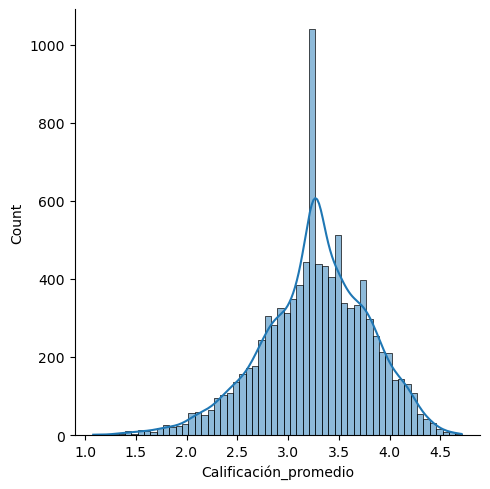

In [47]:
sns.displot(df['Calificación_promedio'], kde=True) 
sns.despine() 

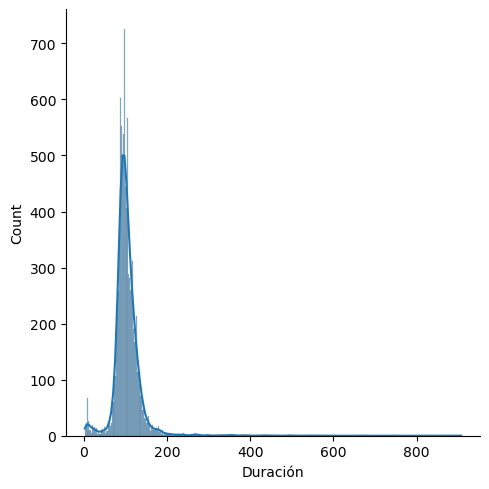

In [48]:
sns.displot(df['Duración'], kde=True) 
sns.despine() 

Debido a que las variables Calificación promedio y Duración presentan distribución normal utilizaremos zscore para detectar outliers

*Calificación_promedio*

In [49]:
from scipy.stats import zscore
df['zscore'] = zscore(df['Calificación_promedio'])

outliers = df[(df['zscore'] > 3) | (df['zscore'] < -3)]

print("Cantidad de outliers encontrados:", len(outliers))
print(outliers[['Calificación_promedio', 'zscore']])

Cantidad de outliers encontrados: 54
      Calificación_promedio    zscore
157                    1.49 -3.370698
650                    1.57 -3.219093
1050                   1.66 -3.048536
1100                   1.65 -3.067487
1172                   1.68 -3.010635
1705                   1.35 -3.636009
1827                   1.43 -3.484403
1993                   1.56 -3.238043
2506                   1.28 -3.768664
2575                   1.49 -3.370698
2935                   1.53 -3.294896
3215                   1.63 -3.105388
3220                   1.11 -4.090826
3221                   1.40 -3.541255
3222                   1.54 -3.275945
3223                   1.57 -3.219093
3227                   1.62 -3.124339
3812                   1.34 -3.654959
4176                   1.24 -3.844467
4178                   1.29 -3.749713
4333                   1.60 -3.162240
4366                   1.44 -3.465452
4367                   1.68 -3.010635
4531                   1.52 -3.313846
4652         

In [50]:
print("Valor mínimo:", df['Calificación_promedio'].min())
print("Valor máximo:", df['Calificación_promedio'].max())

Valor mínimo: 1.08
Valor máximo: 4.71


La calificación promedio tiene un rango de 1 a 5 por lo tanto los valores que estadisticamente son identificados como outliers, son calificaciones promedio bajas pero se encuntran dentro del rango que podria recibir una pelicula, por lo tanto dichos valores seran conservados.

*Duración*

In [51]:
from scipy.stats import zscore
df['zscore'] = zscore(df['Duración'])

outliers = df[(df['zscore'] > 3) | (df['zscore'] < -3)]

print("Cantidad de outliers encontrados:", len(outliers))
print(outliers[['Duración', 'zscore']])

Cantidad de outliers encontrados: 105
      Duración     zscore
12       228.0   3.297172
145      233.0   3.429602
369      467.0   9.627332
717      379.0   7.296562
889      316.0   5.627942
...        ...        ...
9908     600.0  13.149973
9909     300.0   5.204166
9916     585.0  12.752683
9994     344.0   6.369551
9996     270.0   4.409585

[105 rows x 2 columns]


Hacemos un top 10 de las peliculas con mayor duracion para ver a que se tratan los valores fuera de rango.

In [52]:
top10 = df.sort_values(by='Duración', ascending=False).head(10)
print(top10)

                             Titulo                  Director  \
8827          Berlin Alexanderplatz  Rainer Werner Fassbinder   
3082                          Out 1           Jacques Rivette   
7517                Big Little Lies          Jean-Marc Vallée   
9166                    I, Claudius              Herbert Wise   
4376           Brideshead Revisited         Charles Sturridge   
9908                     Your Honor             Edward Berger   
9916       The Underground Railroad             Barry Jenkins   
1821                          Shoah           Claude Lanzmann   
7542  Tie Xi Qu: West of the Tracks                 Wang Bing   
6193                  Into the West           Robert Dornhelm   

      Calificación_promedio       Genero  Duración     Pais Lenguaje  \
8827                   4.23        Crime     907.0  Germany   German   
3082                   4.06      Mystery     743.0   France   French   
7517                   4.33        Drama     702.0      USA  English

Cuando analizamos los ouliers de duración observamos que los valores mas altos son series y no son objeto de nuestro estudio, por lo tanto buscaremos palabras claves dentro del titulo y la descripción que nos indiquen cuantas hay.

In [53]:
keywords = ['season', 'episode', 'series', 'part']

def check_series(row):
    Titulo = str(row['Titulo']).lower() if pd.notna(row['Titulo']) else ''
    Descripción = str(row['Descripción']).lower() if pd.notna(row['Descripción']) else ''
    text = Titulo + Descripción  
    return any(keyword in text for keyword in keywords)

df['is_series'] = df.apply(check_series, axis=1)
print(df['is_series'].sum())

1077


Eliminamos las series 

In [54]:
df = df[~df['is_series']]
ids = df['ID'].copy()

Volvemos a realizar el analisis de los outliers

In [55]:
from scipy.stats import zscore
df['zscore'] = zscore(df['Duración'])

outliers = df[(df['zscore'] > 3) | (df['zscore'] < -3)]

print("Cantidad de outliers encontrados:", len(outliers))
print(outliers[['Duración', 'zscore']])

Cantidad de outliers encontrados: 88
      Duración     zscore
12       228.0   3.398041
145      233.0   3.534422
369      467.0   9.917053
717      379.0   7.516747
889      316.0   5.798346
...        ...        ...
9835     326.0   6.071108
9908     600.0  13.544787
9909     300.0   5.361927
9916     585.0  13.135644
9994     344.0   6.562080

[88 rows x 2 columns]


In [56]:
top10 = df.sort_values(by='Duración', ascending=False).head(10)
print(top10)

                             Titulo                  Director  \
8827          Berlin Alexanderplatz  Rainer Werner Fassbinder   
3082                          Out 1           Jacques Rivette   
7517                Big Little Lies          Jean-Marc Vallée   
4376           Brideshead Revisited         Charles Sturridge   
9908                     Your Honor             Edward Berger   
9916       The Underground Railroad             Barry Jenkins   
1821                          Shoah           Claude Lanzmann   
7542  Tie Xi Qu: West of the Tracks                 Wang Bing   
6193                  Into the West           Robert Dornhelm   
8689                      The Stand                Josh Boone   

      Calificación_promedio       Genero  Duración     Pais Lenguaje  \
8827                   4.23        Crime     907.0  Germany   German   
3082                   4.06      Mystery     743.0   France   French   
7517                   4.33        Drama     702.0      USA  English

Observamos que no se eliminaron todos los outliers y que seguimos teniendo series en nuestra lista, por lo tanto pondremos un limite de 210 minutos (3,5 horas).

In [57]:
df = df[df['Duración'] <= 210.0]
ids = df['ID'].copy()

# Mostrar cantidad de filas antes y después
print("Filas originales:", len(df))
print("Filas después del filtrado:", len(df))

Filas originales: 8704
Filas después del filtrado: 8704


In [58]:
top10 = df.sort_values(by='Duración', ascending=False).head(10)
print(top10)

                       Titulo                  Director  \
8826            Mrs. Fletcher         Nicole Holofcener   
7530             The Irishman           Martin Scorsese   
2691            War and Peace                King Vidor   
1842            Seven Samurai            Akira Kurosawa   
5414               Shackleton         Charles Sturridge   
2986  The Fighting Devil Dogs              John English   
5526          World on a Wire  Rainer Werner Fassbinder   
3071            Boccaccio '70          Vittorio De Sica   
1319                Malcolm X                 Spike Lee   
1335                    Giant            George Stevens   

      Calificación_promedio           Genero  Duración       Pais  Lenguaje  \
8826               3.600000            Drama     210.0        USA   English   
7530               3.910000          History     209.0        USA   English   
2691               3.350000            Drama     208.0      Italy   English   
1842               4.610000       

Observamos que el filtro se aplicó con exito

Debido a que las variable Vistas y Ratings tienen sesgo utilizaremos el metodo Rango intercuartilico para detectar outliers

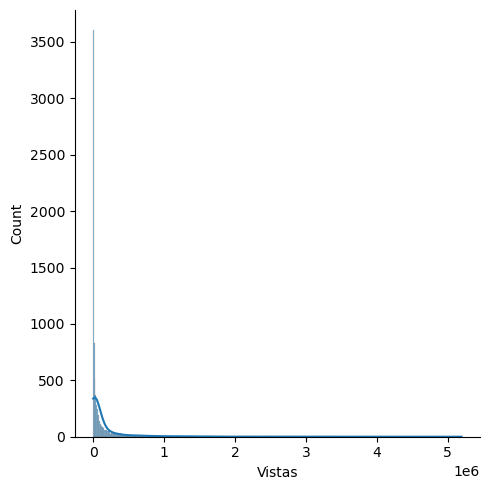

In [59]:
sns.displot(df['Vistas'], kde=True) 
sns.despine() 

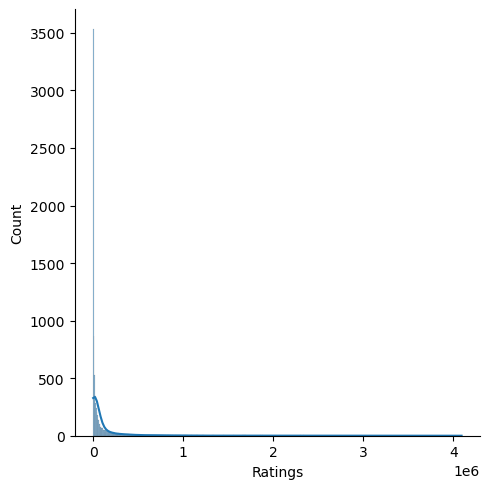

In [60]:
sns.displot(df['Ratings'], kde=True) 
sns.despine() 

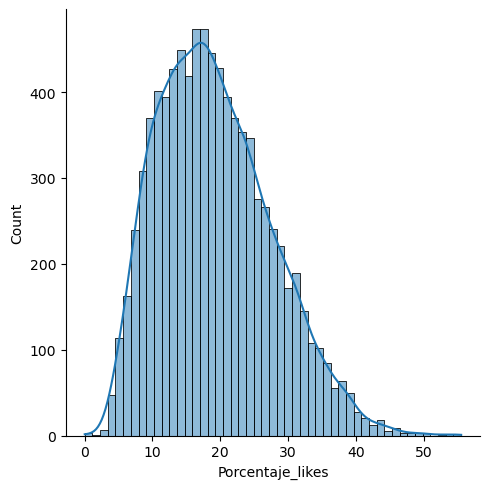

In [61]:
sns.displot(df['Porcentaje_likes'], kde=True) 
sns.despine() 

La columna Vistas, Ratings y Porcentaje_likes presentan sesgo por lo tanto utilizaremos el metodo de rango intercuartilico para detectar outliers

*Vistas*

In [62]:
Q1 = df['Vistas'].quantile(0.25)
Q3 = df['Vistas'].quantile(0.75)
IQR = Q3 - Q1

# Límites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers = df[(df['Vistas'] < limite_inferior) | (df['Vistas'] > limite_superior)]
print("Cantidad de outliers encontrados:", len(outliers))
print(outliers[['Vistas']])

Cantidad de outliers encontrados: 1254
       Vistas
1     2488721
3     1596190
4      873068
6      283873
7     3014320
...       ...
9933   367484
9934   304029
9967   328284
9968   697663
9978   889283

[1254 rows x 1 columns]


In [63]:
top10 = df.sort_values(by='Vistas', ascending=False).head(10)
print(top10)

                                 Titulo           Director  \
9826                             Barbie       Greta Gerwig   
265                          Fight Club      David Fincher   
243                        Interstellar  Christopher Nolan   
7554                           Parasite       Bong Joon Ho   
7552                              Joker      Todd Phillips   
9817  Spider-Man: Into the Spider-Verse    Bob Persichetti   
18                      The Truman Show         Peter Weir   
862                           Inception  Christopher Nolan   
1232                        Ratatouille          Brad Bird   
634                        Forrest Gump    Robert Zemeckis   

      Calificación_promedio           Genero  Duración         Pais Lenguaje  \
9826                   3.78           Comedy     114.0           UK  English   
265                    4.27            Drama     139.0      Germany  English   
243                    4.41  Science Fiction     169.0           UK  English 

Cuando analizamos los valores mas altos de Vistas vemos que no se trata de errores en los registros, ya que hay peliculas que realmente recibieron esas visitas. Analizamos las 10 peliculas mas vistas y observamos que son peliculas que fueron exitosas en los ultimos tiempos, por lo tanto conservaremos esos valores.

*Ratings*

In [64]:
Q1 = df['Ratings'].quantile(0.25)
Q3 = df['Ratings'].quantile(0.75)
IQR = Q3 - Q1

# Límites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers = df[(df['Ratings'] < limite_inferior) | (df['Ratings'] > limite_superior)]
print("Cantidad de outliers encontrados:", len(outliers))
print(outliers[['Ratings']])

Cantidad de outliers encontrados: 1243
      Ratings
1     1682389
3     1076949
4      600721
6      183927
7     1780203
...       ...
9933   316501
9934   262071
9967   243736
9968   633397
9978   782412

[1243 rows x 1 columns]


In [65]:
top10 = df.sort_values(by='Ratings', ascending=False).head(10)
print(top10)

                                 Titulo           Director  \
9826                             Barbie       Greta Gerwig   
7554                           Parasite       Bong Joon Ho   
243                        Interstellar  Christopher Nolan   
265                          Fight Club      David Fincher   
7552                              Joker      Todd Phillips   
9817  Spider-Man: Into the Spider-Verse    Bob Persichetti   
9126  Everything Everywhere All at Once   Daniel Scheinert   
9825                        Oppenheimer  Christopher Nolan   
8943                               Dune   Denis Villeneuve   
21                             Whiplash    Damien Chazelle   

      Calificación_promedio           Genero  Duración         Pais Lenguaje  \
9826                   3.78           Comedy     114.0           UK  English   
7554                   4.55           Comedy     133.0  South Korea   Korean   
243                    4.41  Science Fiction     169.0           UK  English 

Cuando analizamos los outliers de la variable Ratings observamos que son las mismas peliculas que aparecieron con mas Vistas y Likes, por lo tanto también se conservaran estos valores 

*Porcentaje_likes*

In [66]:
Q1 = df['Porcentaje_likes'].quantile(0.25)
Q3 = df['Porcentaje_likes'].quantile(0.75)
IQR = Q3 - Q1

# Límites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers = df[(df['Porcentaje_likes'] < limite_inferior) | (df['Porcentaje_likes'] > limite_superior)]
print("Cantidad de outliers encontrados:", len(outliers))
print(outliers[['Porcentaje_likes']])

Cantidad de outliers encontrados: 57
      Porcentaje_likes
21           47.094243
80           46.531302
108          43.409498
243          47.909539
265          45.961517
280          44.596920
495          43.990640
587          43.317558
610          45.567265
884          44.253989
1531         43.919918
1791         43.324516
1891         43.684645
1920         45.474817
1923         45.384682
2158         45.144426
2185         52.279308
2577         43.334153
3158         45.359116
4156         42.723896
4218         44.018715
4373         42.630680
4375         44.145659
4399         43.840399
4690         42.492814
4747         43.877945
4871         42.888852
5654         49.241539
5811         43.063306
6024         42.812797
6720         50.358195
6759         45.283019
6985         43.442024
7018         50.000000
7106         43.893014
7332         45.662606
7554         54.452456
7567         47.235237
7673         43.746827
7943         43.589744
8393         43.7650

Cuando analizamos los outliers de la variable Porcentaje_likes observamos que son valores que podria tomar la variable si la pelicula le gusto a mas del 50% del público que la vio. Por lo tanto, se conservarán estos valores. 

**Selección de columnas para aplicar modelo de aprendisaje no supervisado**

In [67]:
df.dtypes

Titulo                    object
Director                  object
Calificación_promedio    float64
Genero                    object
Duración                 float64
Pais                      object
Lenguaje                  object
Descripción               object
Productora                object
Vistas                     int64
Ratings                    int64
ID                         int64
Protagonista              object
Coprotagonista            object
Porcentaje_likes         float64
zscore                   float64
is_series                   bool
dtype: object

Eliminacion de columnas que no utilizaremos para la elaboracion del modelo no supervisado. Conservaremos las columnas numéricas y las categoricas que son de interes para nuestro analisis serán exploradas y transformadas con Get Dummies a continuación.

In [68]:
df = df.drop(columns=['Titulo', 'Descripción' , 'Coprotagonista', 'zscore' , 'is_series'])

In [69]:
#Corroboramos la eliminación
df.dtypes

Director                  object
Calificación_promedio    float64
Genero                    object
Duración                 float64
Pais                      object
Lenguaje                  object
Productora                object
Vistas                     int64
Ratings                    int64
ID                         int64
Protagonista              object
Porcentaje_likes         float64
dtype: object

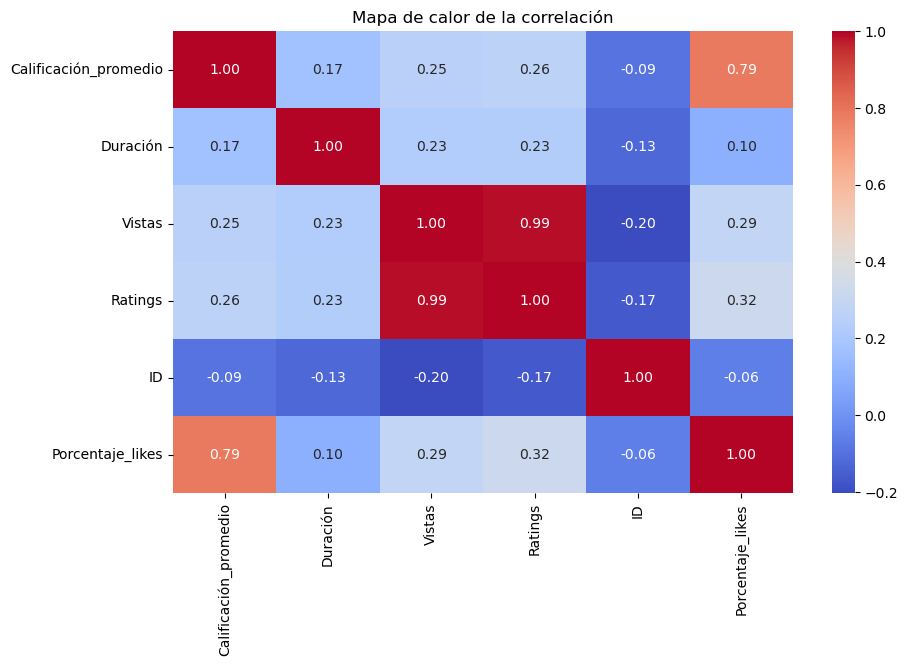

In [70]:
#Calculamos la matriz de correlación
correlation_matrix = df.corr(numeric_only=True)

# Creamos el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de calor de la correlación")
plt.show()

En el mapa de calor observamos que las variables Porcentaje_likes y Calificación_pormedio y Ratings y Vistas tienen alta correlacion por lo tanto, eliminaremos Porcentaje_likes (conservaremos Calificación_promedio porque es la variable que seleccionamos predecir en los modelos supervizados) y Vistas

In [71]:
df = df.drop(columns=['Porcentaje_likes' , 'Vistas'])

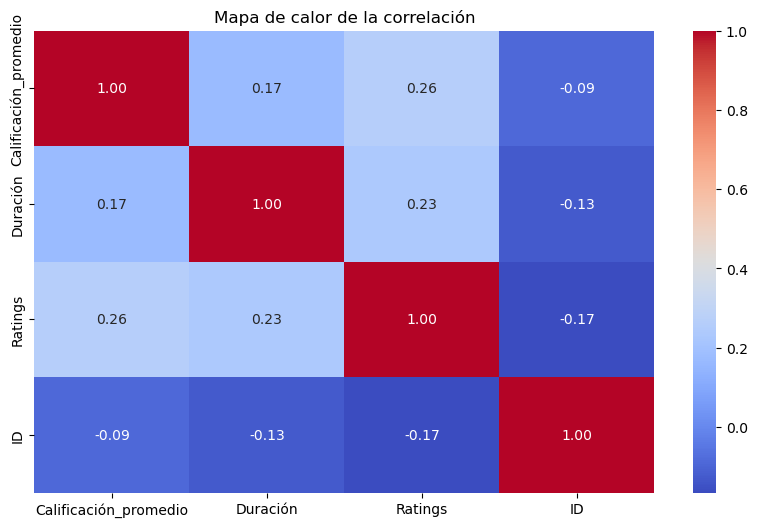

In [72]:
#Calculamos la matriz de correlación nuevamente 
correlation_matrix = df.corr(numeric_only=True)

# Creamos el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de calor de la correlación")
plt.show()

Ovservamos que no hay alta correlación entre las variables

### Transformacion de datos categóricos One Hot Encoding

Debido a que las variables a transformar son categóricas y no tienen un orden predeterminado utilizaremos OneHotEncoding

In [73]:
import joblib

In [74]:
# Especificamos las columnas categóricas que necesitamos transformar
columnas_categoricas = ['Director', 'Genero' , 'Pais' , 'Lenguaje', 'Productora', 'Protagonista']  

# Aplicamos One Hot Encoding
df = pd.get_dummies(df, columns=columnas_categoricas)

# Convertír todas las columnas booleanas a enteros
df = df.astype(int)

# Vemos los resultados aplicados a las primeras filas 
print(df.head())

X = df  

# Guardamos las columnas exactas usadas (lo utilizaremos mas adelante)
columnas_usadas = X.columns.tolist()
joblib.dump(columnas_usadas, 'columnas_usadas.pkl')

   Calificación_promedio  Duración  Ratings  ID  Director_  \
0                      3        92     9042   0          0   
1                      4       121  1682389   1          0   
3                      3       102  1076949   3          0   
4                      4       124   600721   4          0   
6                      3       100   183927   6          0   

   Director_A.V. Rockwell  Director_Aaron B. Koontz  Director_Aaron Blaise  \
0                       0                         0                      0   
1                       0                         0                      0   
3                       0                         0                      0   
4                       0                         0                      0   
6                       0                         0                      0   

   Director_Aaron Hann  Director_Aaron Horvath  ...  Protagonista_Zoey Deutch  \
0                    0                       0  ...                         0

['columnas_usadas.pkl']

### Modelos de aprendizaje no supervisado

**Instalacion de librerias y carga del dataset**

In [75]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator

In [76]:
df.head()

,Calificación_promedio,Duración,Ratings,ID,Director_,Director_A.V. Rockwell,Director_Aaron B. Koontz,Director_Aaron Blaise,Director_Aaron Hann,Director_Aaron Horvath,...,Protagonista_Zoey Deutch,Protagonista_Zohra Lampert,Protagonista_Zoé Héran,Protagonista_Zoë Lund,Protagonista_Zsófia Psotta,Protagonista_mgk,Protagonista_Édouard Baer,Protagonista_Éléonore Klarwein,Protagonista_Émilie Dequenne,Protagonista_Éric Caravaca
0,3,92,9042,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,121,1682389,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,102,1076949,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,124,600721,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,3,100,183927,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
df.dtypes

Calificación_promedio             int64
Duración                          int64
Ratings                           int64
ID                                int64
Director_                         int64
                                  ...  
Protagonista_mgk                  int64
Protagonista_Édouard Baer         int64
Protagonista_Éléonore Klarwein    int64
Protagonista_Émilie Dequenne      int64
Protagonista_Éric Caravaca        int64
Length: 12926, dtype: object

## Clustering

**Kmeans**

*Métrica: Elbow*

Comenzaremos aplicando el metodo Elbow para encontrar el número optimo de Clusters. A partir de dicho valor, aplicaremos kmeans

In [78]:
#Nos aseguramos de utilizar solo columnas numéricos
df_cluster= df.select_dtypes(include='number').copy()
# Quitamos 'ID' para no escalarla
if 'ID' in df_cluster.columns:
    df_cluster = df_cluster.drop(columns=['ID'])

In [79]:
# Guardamos ID
ids = df['ID'].copy()

# Escalamos sin ID
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# Convertimos a DataFrame y agregamos ID
X_scaled_df = pd.DataFrame(X_scaled, columns=df_cluster.columns)
X_scaled_df['ID'] = ids.values

Corroboramos que las variables estan escaladas, con media cercana a 0 y desvio =1

In [80]:
print("Media por columna:", np.mean(X_scaled, axis=0))
print("Desviación estándar por columna:", np.std(X_scaled, axis=0))

Media por columna: [-1.81227582e-16  1.46124942e-16 -1.63268092e-17 ...  3.87761718e-18
  1.63268092e-18  1.01022132e-17]
Desviación estándar por columna: [1. 1. 1. ... 1. 1. 1.]


In [81]:
# Aplicamos método Elbow para encontrar el mejor número de clusters
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)


In [82]:
# Utilizamos KneeLocator para encontrar el k óptimo
kneedle = KneeLocator(K_range, inertias, curve='convex', direction='decreasing')
k_optimo = kneedle.knee

TypeError: '>' not supported between instances of 'float' and 'NoneType'

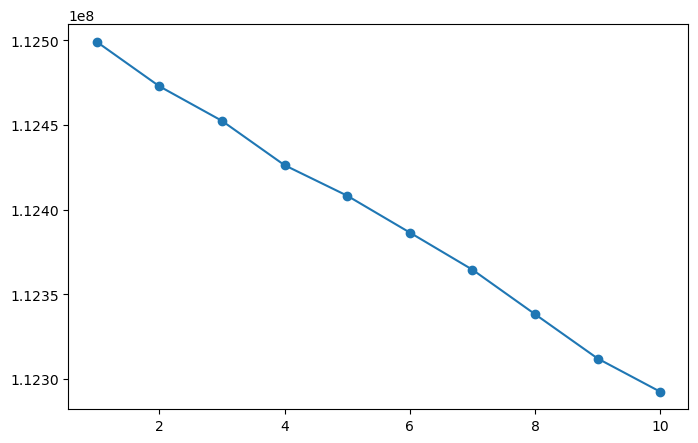

In [83]:
# Gráficamos para obseravr el k óptimo
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o')
plt.axvline(x=k_optimo, color='red', linestyle='--', label=f'k óptimo = {k_optimo}')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo con k óptimo')
plt.legend()
plt.grid(True)
plt.show()

print(f"El número óptimo de clusters es: {k_optimo}")

El modelo Elbow no detecta el valor de k óptimo por este motivo el código da error. 

Debido a que no se observó un codo claramente, incluso la función arroja error, y tampoco pudimos encontrarlo de forma analítica, aplicamos a continuación tres opciones:**1)** Utilizaremos Silhouette Score en vez de Elbow, **2)** Realizaremos PCA antes de aplicar Elbow, **3)** Ampliaremos el rango.

**OPCION 1: Silhouette Score**

In [84]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [85]:
silhouettes = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouettes.append(score)

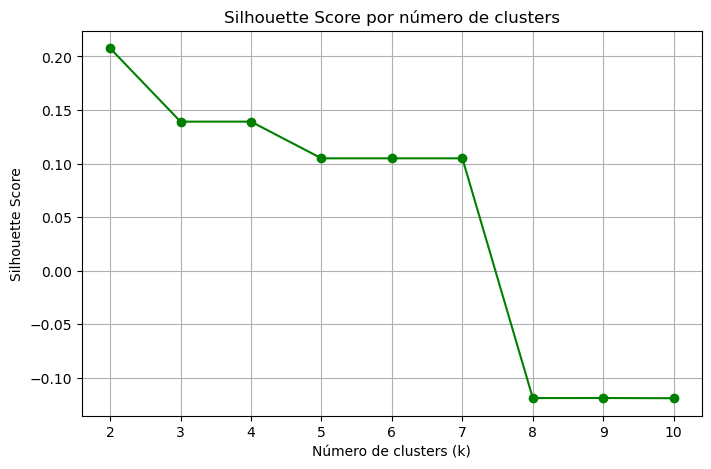

In [86]:
#Graficamos
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouettes, marker='o', color='green')
plt.xlabel("Número de clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score por número de clusters")
plt.grid(True)
plt.show()

In [87]:
# Elegimos el k con mayor score
k_optimo = range(2, 11)[silhouettes.index(max(silhouettes))]
print(f"El mejor k según Silhouette Score es: {k_optimo}")

El mejor k según Silhouette Score es: 2


**OPCION 2: PCA y luego Elbow**

*PCA*

Elejimos automáticamente cuántos componentes PCA conservar para explicar al menos el 90% de la varianza total.

In [87]:
def elegir_n_componentes_pca(X, varianza_objetivo=0.90):
    
    # PCA sin reducir aún
    pca_temp = PCA()
    pca_temp.fit(X)

    # Calculamos varianza acumulada
    varianza_acumulada = np.cumsum(pca_temp.explained_variance_ratio_)

    # Encontramos el mínimo número de componentes que cumple el objetivo
    n_componentes = np.argmax(varianza_acumulada >= varianza_objetivo) + 1

    print(f'Número óptimo de componentes para cubrir {varianza_objetivo*100:.1f}% de la varianza: {n_componentes}')
    return n_componentes

In [393]:
n_comp = elegir_n_componentes_pca(X_scaled)
print(f"Componentes seleccionados: {n_comp}")

Número óptimo de componentes para cubrir 90.0% de la varianza: 5416
Componentes seleccionados: 5416


Debido a que el resultado es muy elevado, utilizaremos un gráfico para ver cuánta varianza se explica con menos componentes. Nos permitirá visualizar si necesitamos realmente 5416 o si con menor cantidad de componentes explicariamos aproximadamente el 90%.

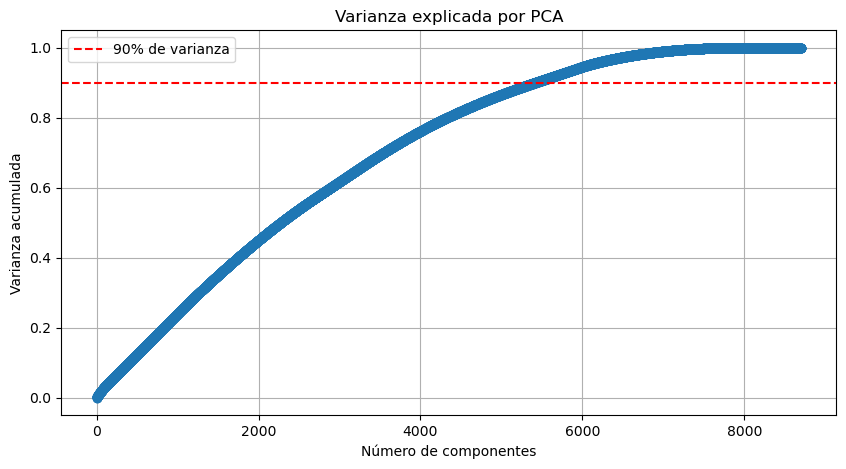

In [394]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA()
pca.fit(X_scaled)

var_acum = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 5))
plt.plot(var_acum, marker='o')
plt.xlabel("Número de componentes")
plt.ylabel("Varianza acumulada")
plt.title("Varianza explicada por PCA")
plt.grid(True)
plt.axhline(y=0.90, color='r', linestyle='--', label='90% de varianza')
plt.legend()
plt.show()

En el gráfico se observa claramente que necesitamos una gran cantidad de componenetes para explicar el 90% de la varianza y que por la forma de la curva una disminución de los componentes implica una disminución importante en la varianza explicada. Esto se debe a que aplicamos One hot encoding y cada categoría nueva crea una columna. Numerosas columnas categóricas con alta cardinalidad originan muchas con información redundante o casi nula.

Debido a esto realizaremos elección y la carga manual de los componentes.

In [88]:
# Como X_scaled_df tiene la columna ID, la excluimos antes de PCA
X_for_pca = X_scaled_df.drop(columns=['ID'])

# Aplicamos PCA con 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_for_pca)

# Creamos DataFrame con resultados PCA, con el mismo índice que ids
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'], index=ids.index)

# Agregamos columna ID para referencia
df_pca['ID'] = ids.values

In [89]:
#Corroboramos que la cantidad de componenentes y variables sea igual
print(f"Shape de componentes: {pca.components_.shape}")        
print(f"Cantidad de variables: {len(df.columns)}")  

Shape de componentes: (2, 12925)
Cantidad de variables: 12926


In [91]:
print("ID" in df.columns)  

True


In [90]:
#Creamos un DataFrame para graficar
df_pca = pd.DataFrame()
df_pca['PCA1'] = X_pca[:, 0]
df_pca['PCA2'] = X_pca[:, 1]
df_pca['ID'] = ids.values

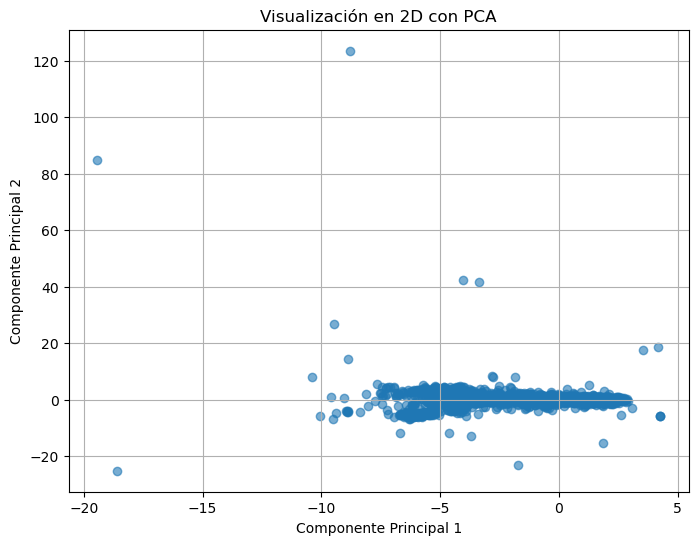

In [92]:
# Graficamos para visualizar los cluster según los componentes principales
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], alpha=0.6)
plt.title('Visualización en 2D con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

In [93]:
#Observamos la contribución (o "peso") de cada variable en cada componente
columnas_sin_id = X_scaled_df.columns.drop('ID')

componentes = pd.DataFrame(
    pca.components_,
    columns=columnas_sin_id,
    index=['PCA1', 'PCA2']
)

print(componentes.T)

                                    PCA1      PCA2
Calificación_promedio          -0.113476 -0.009193
Duración                       -0.023297  0.022446
Ratings                         0.043235 -0.007323
Director_                       0.006450 -0.001067
Director_A.V. Rockwell          0.002018  0.000359
...                                  ...       ...
Protagonista_mgk                0.002400 -0.000960
Protagonista_Édouard Baer      -0.011264 -0.002921
Protagonista_Éléonore Klarwein -0.009015 -0.000361
Protagonista_Émilie Dequenne   -0.009229  0.000089
Protagonista_Éric Caravaca     -0.008727 -0.000185

[12925 rows x 2 columns]


Los valores negativos indican que esa variable tiene un promedio más bajo en ese grupo comparado con el resto, especialmente si está estandarizada.
Si la misma variable es negativa en todos los clusters significa que probablemente no ayuda a diferenciar los clusters (todos están por debajo del promedio).

In [94]:
# Aplicamos método Elbow luego de aplicar PCA
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertias.append(kmeans.inertia_)

In [95]:
# Aplicamos KneeLocator para detectar el codo
kneedle = KneeLocator(K_range, inertias, curve='convex', direction='decreasing')
k_optimo = kneedle.knee

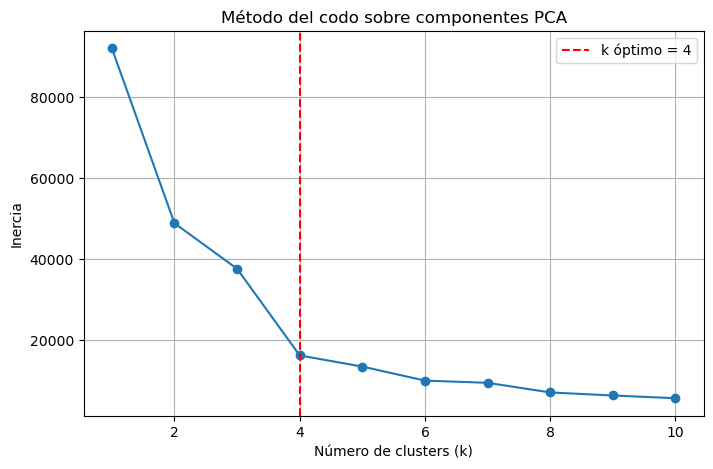

El número óptimo de clusters detectado es: 4


In [96]:
#Graficamos con k_optimo
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o')
plt.axvline(x=k_optimo, color='red', linestyle='--', label=f'k óptimo = {k_optimo}')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo sobre componentes PCA')
plt.legend()
plt.grid(True)
plt.show()

print(f"El número óptimo de clusters detectado es: {k_optimo}")

Aplicando PCA antes del método Elbow obtenemos un valor óptimo de k.

**OPCIÓN 3: Cambio de rango de k**

In [97]:
# Aplicamos método Elbow para encontrar el mejor número de clusters cambiando el rango
inertias = []
K_range = range(1, 21)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

In [98]:
# Utilizamos KneeLocator para encontrar el k óptimo
kneedle = KneeLocator(K_range, inertias, curve='convex', direction='decreasing')
k_optimo = kneedle.knee

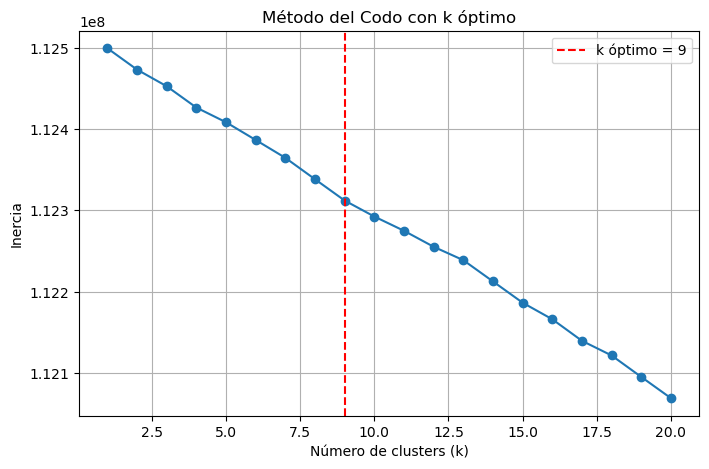

El número óptimo de clusters es: 9


In [99]:
# Gráficamos para obseravr el k óptimo
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o')
plt.axvline(x=k_optimo, color='red', linestyle='--', label=f'k óptimo = {k_optimo}')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo con k óptimo')
plt.legend()
plt.grid(True)
plt.show()

print(f"El número óptimo de clusters es: {k_optimo}")

Realizando cambio de rango también se identifica un valor de k óptimo, por lo tanto a continuación realizaremos KMeans con los valores de k obtenidos en las tres Opciones. 

*Aplicación de Kmeans*

In [100]:
# Aplicamos KMeans (k=2, obtenido con Slihouette)
k = 2 
kmeans = KMeans(n_clusters=k, random_state=42)
clusters_k2 = kmeans.fit_predict(X_scaled)

In [102]:
#Agregamos cluster al DataFrame original
df_clusters = df.copy()
df_clusters[f'Cluster_{k}'] = clusters_k2

In [103]:
#Mostramos el resumen
print("\nCantidad de elementos por cluster:")
print(df_clusters['Cluster_2'].value_counts())
    
print("\nCentroides de los clusters (en escala):")
print(kmeans.cluster_centers_)


Cantidad de elementos por cluster:
Cluster_2
0    8703
1       1
Name: count, dtype: int64

Centroides de los clusters (en escala):
[[-4.20226343e-05 -2.31749376e-05  2.60891383e-05 ...  1.23167613e-06
   1.23167613e-06  1.23167613e-06]
 [ 3.65722987e-01  2.01691482e-01 -2.27053771e-01 ... -1.07192774e-02
  -1.07192774e-02 -1.07192774e-02]]


C:\Users\natie\AppData\Local\Temp\ipykernel_8380\3634703314.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')


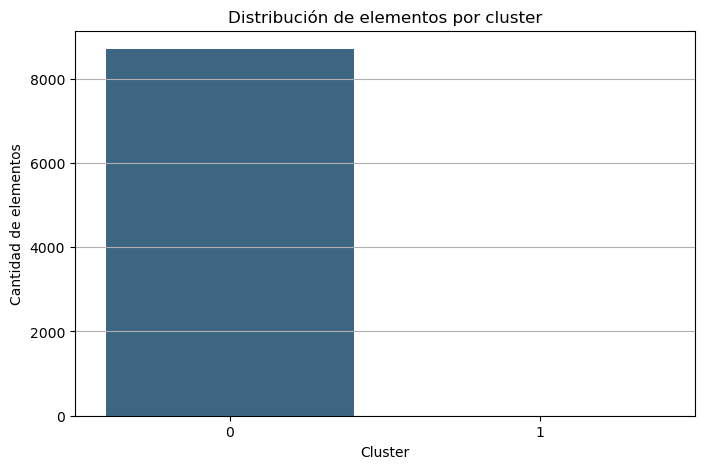

In [104]:
#Contamos cuántos elementos hay en cada cluster
cluster_counts = df_clusters['Cluster_2'].value_counts().sort_index()

# Creamos el gráfico de barras para observar la distribución de elementos por cluster
plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')

plt.xlabel('Cluster')
plt.ylabel('Cantidad de elementos')
plt.title('Distribución de elementos por cluster')
plt.grid(True, axis='y')
plt.show()

Se observa un desbalance importante en la cantidad de datos por clusters con k=2

In [105]:
# Aplicamos KMeans (k=, obtenido con Elbow luwgo de PCA con parámetros optimizados)
k = 4 
kmeans = KMeans(n_clusters=k, random_state=42)
clusters_k4 = kmeans.fit_predict(X_pca)

In [106]:
#Agregamos cluster al DataFrame original
df_clusters= df.copy()
df_clusters[f'Cluster_{k}'] = clusters_k4

In [107]:
#Mostramos el resumen
print("\nCantidad de elementos por cluster:")
print(df_clusters['Cluster_4'].value_counts())
    
print("\nCentroides de los clusters (en escala):")
print(kmeans.cluster_centers_)


Cantidad de elementos por cluster:
Cluster_4
0    7020
1    1361
2     321
3       2
Name: count, dtype: int64

Centroides de los clusters (en escala):
[[ 1.09075026e+00  3.42909041e-04]
 [-4.21420448e+00  1.06386727e+00]
 [-5.90334294e+00 -5.18664608e+00]
 [-1.41252886e+01  1.04166154e+02]]


C:\Users\natie\AppData\Local\Temp\ipykernel_8380\2210643673.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')


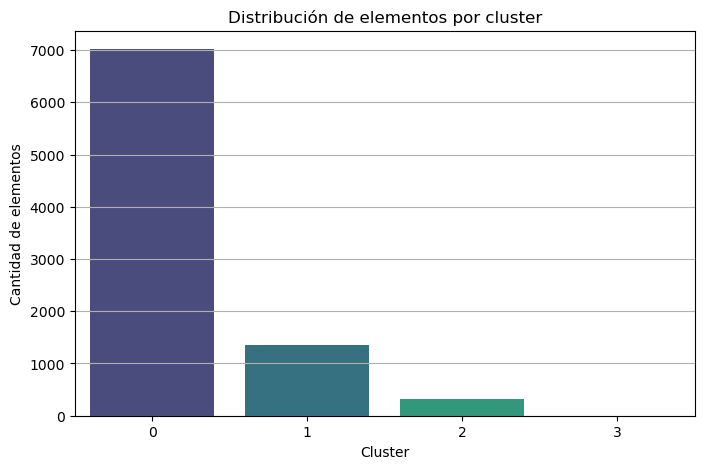

In [108]:
#Contamos cuántos elementos hay en cada cluster
cluster_counts = df_clusters['Cluster_4'].value_counts().sort_index()

# Creamos el gráfico de barras para observar la distribución de elementos por cluster
plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')

plt.xlabel('Cluster')
plt.ylabel('Cantidad de elementos')
plt.title('Distribución de elementos por cluster')
plt.grid(True, axis='y')
plt.show()

In [109]:
# Aplicamos KMeans (k=9, obtenido con ampliación de rango en Elbow)
k = 9 
kmeans = KMeans(n_clusters=k, random_state=42)
clusters_k9 = kmeans.fit_predict(X_scaled)

In [110]:
#Agregamos cluster al DataFrame original
df_clusters= df.copy()
df_clusters[f'Cluster_{k}'] = clusters_k9

In [111]:
#Mostramos el resumen
print("\nCantidad de elementos por cluster:")
print(df_clusters['Cluster_9'].value_counts())
    
print("\nCentroides de los clusters (en escala):")
print(kmeans.cluster_centers_)


Cantidad de elementos por cluster:
Cluster_9
7    8633
0      64
8       1
2       1
4       1
6       1
5       1
3       1
1       1
Name: count, dtype: int64

Centroides de los clusters (en escala):
[[-1.10495030e-01 -6.06301721e-01 -3.34672555e-01 ... -1.07192774e-02
  -1.07192774e-02 -1.07192774e-02]
 [ 3.65722987e-01  2.01691482e-01 -2.27053771e-01 ... -1.07192774e-02
  -1.07192774e-02 -1.07192774e-02]
 [-1.32749663e+00 -9.71732137e-01 -3.61348102e-01 ... -1.07192774e-02
  -1.07192774e-02 -1.07192774e-02]
 ...
 [ 3.65722987e-01 -4.45714652e-01 -3.63106434e-01 ... -1.07192774e-02
  -1.07192774e-02 -1.07192774e-02]
 [ 1.11100195e-03  4.89366568e-03  2.74977678e-03 ...  8.81580786e-05
   8.81580786e-05  8.81580786e-05]
 [-1.32749663e+00 -4.45714652e-01 -3.48903471e-01 ... -1.07192774e-02
  -1.07192774e-02 -1.07192774e-02]]


C:\Users\natie\AppData\Local\Temp\ipykernel_8380\1779481400.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')


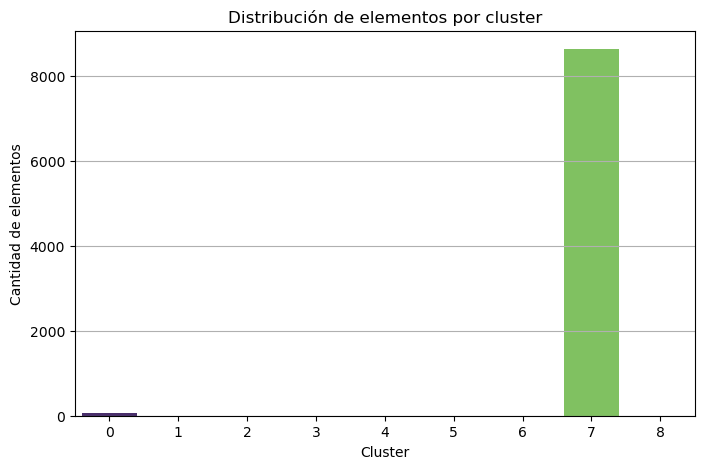

In [112]:
#Contamos cuántos elementos hay en cada cluster
cluster_counts = df_clusters['Cluster_9'].value_counts().sort_index()

# Creamos el gráfico de barras para observar la distribución de elementos por cluster
plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')

plt.xlabel('Cluster')
plt.ylabel('Cantidad de elementos')
plt.title('Distribución de elementos por cluster')
plt.grid(True, axis='y')
plt.show()

 En los tres casos se observa un importante desbalance en la cantidad de datos que integran los clusters. Puede estar sucediendo que debido a que el dataframe presentaba outliers, que fueron conservados por no pertenecer a errores de registro, y gran cantidad de datos con valor 0, kmeans es sensible a ellos y no sería el método más apto para la formación de Clusters.

Debido a que nuestros datos siguen desbalanceados a continuación utilizaremos DBSCAN

**DBSCAN**

Aplicaremos DBSCAN sobre PCA

In [113]:
#Importamos libreria
from sklearn.cluster import DBSCAN

In [114]:
#Aplicamos DBSCAN con PCA previamente realizado
dbscan = DBSCAN(eps=1.5, min_samples=5)  
clusters_DB = dbscan.fit_predict(X_pca)

In [115]:
#Agregamos clusters al DataFrame
df_clusters = df.copy()
df_clusters['Cluster_DB'] = clusters_DB

In [116]:
#Mostramos el resumen
print("\nCantidad de elementos por cluster:")
print(df_clusters['Cluster_DB'].value_counts())


Cantidad de elementos por cluster:
Cluster_DB
 0    8678
-1      26
Name: count, dtype: int64


C:\Users\natie\AppData\Local\Temp\ipykernel_8380\1756069913.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster_DB', data=df_clusters, palette='Set2')


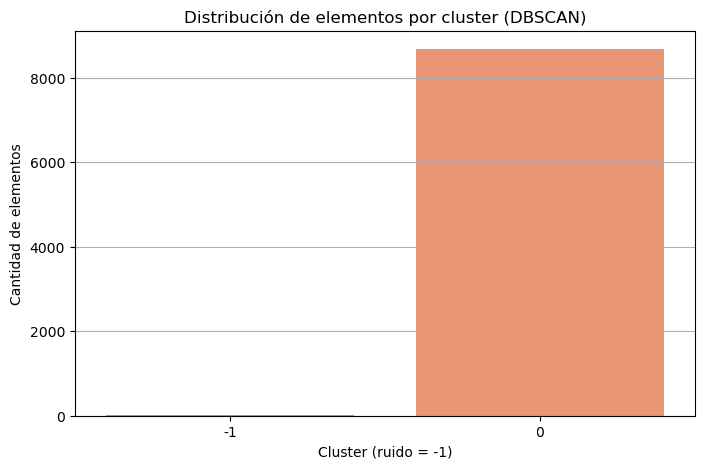

In [117]:
# Graficamos distribución de clusters
plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster_DB', data=df_clusters, palette='Set2')
plt.title("Distribución de elementos por cluster (DBSCAN)")
plt.xlabel("Cluster (ruido = -1)")
plt.ylabel("Cantidad de elementos")
plt.grid(True, axis='y')
plt.show()

In [118]:
# Armamos dataframe para graficar
df_plot = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_plot['Cluster_DB'] = clusters_DB

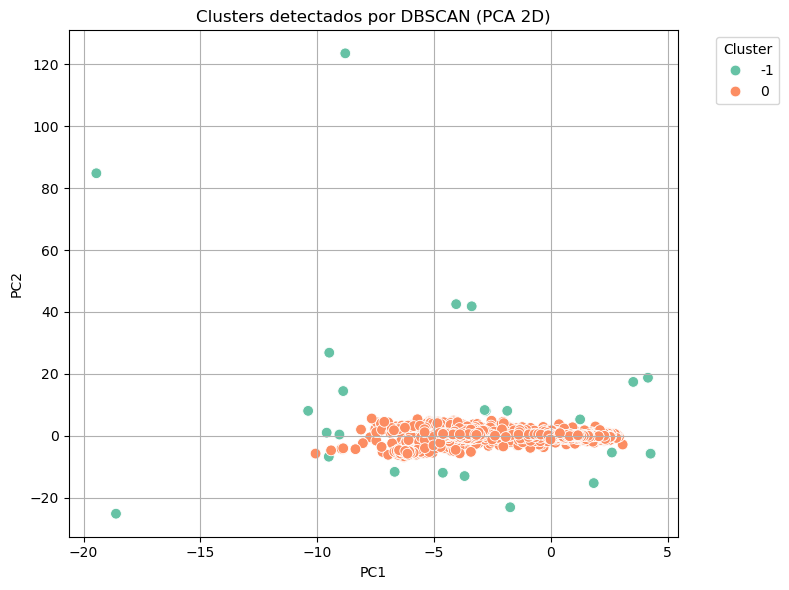

In [119]:
# Gráficamos
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='Cluster_DB',
    palette='Set2',
    data=df_plot,
    legend='full',
    s=60
)
plt.title('Clusters detectados por DBSCAN (PCA 2D)')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Debido a que los datos por clusters estan desbalanceados, no se observa una separación clara de clusters, mas bien se observa una separacion de outliers (-1) optimizaremos los parámetros Eps y Min-samples.

**Min-samples** : utilizaremos 3 ya que contamos con PCA reducido a 2 componentes

**Eps**

Realizaremos los analisis para encontrar un buen valor para el parámetro eps, uitlizaremos el metodo gráfico de k-distancia y KneeLocator

*k-distancia*

In [120]:
from sklearn.neighbors import NearestNeighbors

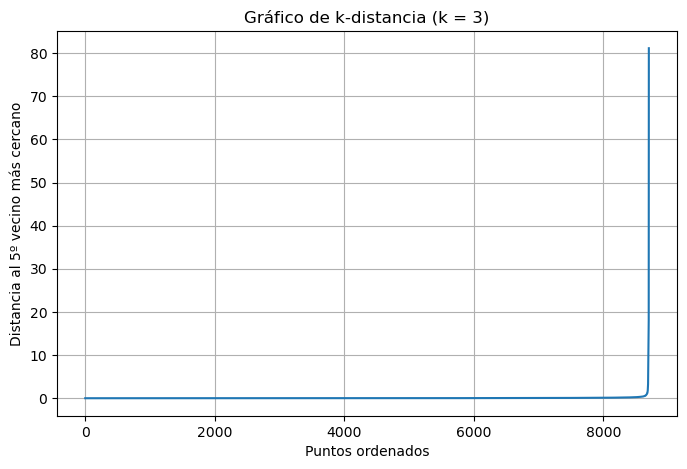

In [121]:
X = X_pca

# Usamos min_samples como número de vecinos 
neighbors = NearestNeighbors(n_neighbors=3)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Tomamos la distancia al k-ésimo vecino más cercano (última columna)
k_distances = np.sort(distances[:, 2])  # índice 2 porque usamos n_neighbors=3

# Graficamos
plt.figure(figsize=(8, 5))
plt.plot(k_distances)
plt.title("Gráfico de k-distancia (k = 3)")
plt.xlabel("Puntos ordenados")
plt.ylabel("Distancia al 5º vecino más cercano")
plt.grid(True)
plt.show()

*KneeLocator*

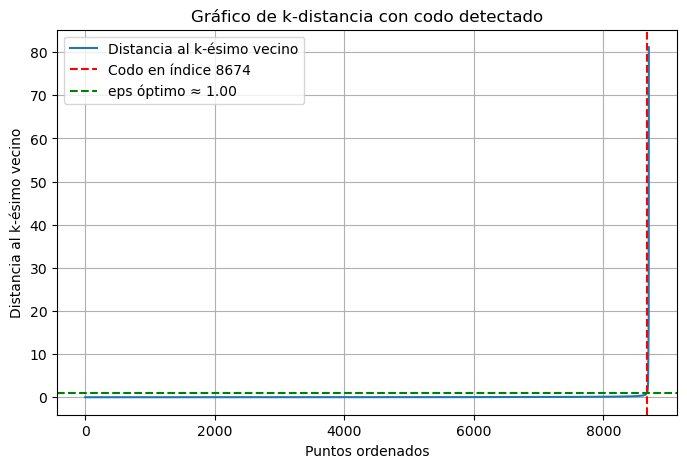

Eps óptimo sugerido para DBSCAN: 1.00


In [122]:
X = X_pca

# Elegimos el número de vecinos 
k = 3
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Ordenamos las distancias al k-ésimo vecino más cercano
k_distances = np.sort(distances[:, 2])

# Detectamos el codo con KneeLocator
kneedle = KneeLocator(range(len(k_distances)), k_distances, curve='convex', direction='increasing')
eps_optimo = kneedle.knee_y  # valor óptimo de eps
indice_codo = kneedle.knee   # posición del codo en el eje X

# Graficamos
plt.figure(figsize=(8, 5))
plt.plot(k_distances, label='Distancia al k-ésimo vecino')
plt.axvline(x=indice_codo, color='red', linestyle='--', label=f'Codo en índice {indice_codo}')
plt.axhline(y=eps_optimo, color='green', linestyle='--', label=f'eps óptimo ≈ {eps_optimo:.2f}')
plt.title("Gráfico de k-distancia con codo detectado")
plt.xlabel("Puntos ordenados")
plt.ylabel("Distancia al k-ésimo vecino")
plt.legend()
plt.grid(True)
plt.show()

print(f"Eps óptimo sugerido para DBSCAN: {eps_optimo:.2f}")

In [123]:
#DBSCAN con eps óptimo
dbscan = DBSCAN(eps=1, min_samples=3)
clusters_DB_1 = dbscan.fit_predict(X)

In [124]:
#Agregamos los clusters al dataset
df_clusters = df.copy()
df_clusters['Cluster_DB_1'] = clusters_DB_1

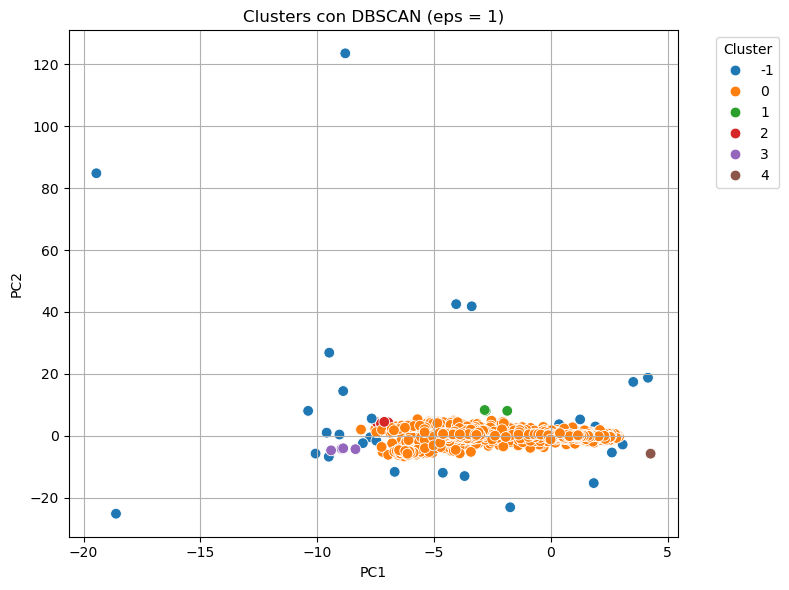

In [126]:
#Visualizamos los clusters
df_plot = pd.DataFrame(X, columns=['PC1', 'PC2'])
df_plot['Cluster_DB_1'] = clusters_DB_1

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_plot, x='PC1', y='PC2', hue='Cluster_DB_1', palette='tab10', s=60)
plt.title('Clusters con DBSCAN (eps = 1)')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [127]:
#Mostramos el resumen
print("\nCantidad de elementos por cluster:")
print(df_plot['Cluster_DB_1'].value_counts())


Cantidad de elementos por cluster:
Cluster_DB_1
 0    8656
-1      28
 2       7
 3       7
 1       3
 4       3
Name: count, dtype: int64


Los clusters continuan desbalanceados. Incluso arma un cluster con outliers, al igual que en el caso anterior.

A continuación probaremos con otro modelo de aprendizaje no supervizado que procesa los outliers de manera diferente a KMeans y DBSCAN

**Gaussian Mixture Models (GMM)** 

In [128]:
from sklearn.mixture import GaussianMixture

In [129]:
#Número de clusters a probar, en este caso elegimos 3. x_pca ya esta definido.
gmm = GaussianMixture(n_components=3, random_state=42)
clusters_k3 = gmm.fit_predict(X_pca)  

In [130]:
#Agregamos los cluster al dataframe
df_pca['Cluster_GMM_k3'] = clusters_k3

# Para análisis con datos originales
df_clusters['Cluster_GMM_k3'] = clusters_k3

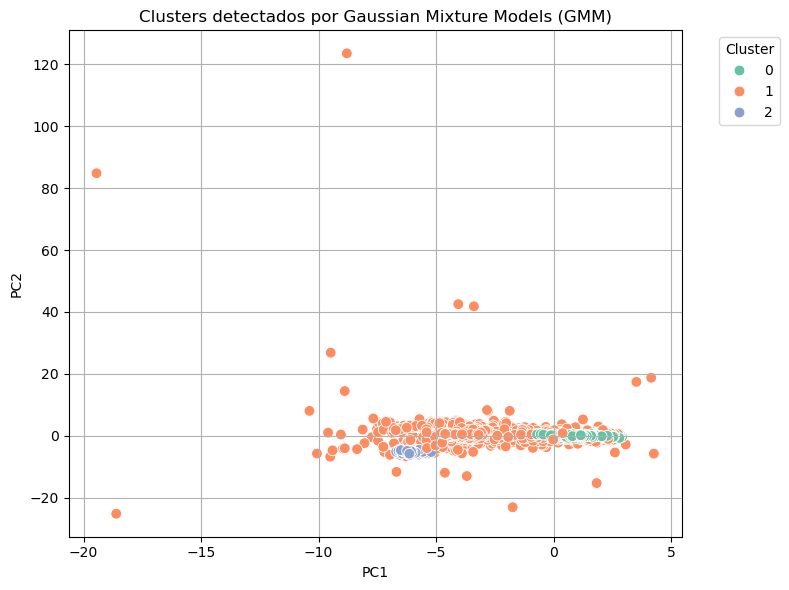

In [131]:
#Graficamos los clusters
df_plot = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_plot['Cluster_GMM_k3'] = clusters_k3

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_plot, x='PC1', y='PC2', hue='Cluster_GMM_k3', palette='Set2', s=60)
plt.title('Clusters detectados por Gaussian Mixture Models (GMM)')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [132]:
#Mostramos el resumen
print("\nCantidad de elementos por cluster:")
print(df_plot['Cluster_GMM_k3'].value_counts())


Cantidad de elementos por cluster:
Cluster_GMM_k3
0    6493
1    1969
2     242
Name: count, dtype: int64


Observamos que si bien los cluster estan desbalanceados, no es tan significativo con en k-means y DBSCAN 

In [134]:
#Aplicamos las metricas al modelo
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

print("Métricas de clustering:")
print(f"Silhouette Score: {silhouette_score(X_pca, clusters_k3):.3f}")
print(f"Davies-Bouldin Index: {davies_bouldin_score(X_pca, clusters_k3):.3f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_score(X_pca, clusters_k3):.3f}")

Métricas de clustering:
Silhouette Score: 0.693
Davies-Bouldin Index: 0.620
Calinski-Harabasz Score: 4091.720


El valor de Silhouette representa un muy buen valor, alta cohesión dentro de cada cluster y buena separación entre clusters. El valor de DB Index es bueno, indica que los clusters son compactos y clara la separación y CH Score es alto y muestra que hay mucha más dispersión entre clusters que dentro de ellos (ideal).

Dado que este analisis se adapta mejor a nuetro dataset ajustaremos los parametros de PCA para luego encontrar el mejor parámetro n-components de GMM

*n_componentes (PCA)*: por lo visto anteriormente elegiremos 2

*n_componenetes GMM:* número de clusters

Con el valor de PCA=2 optimizaremos el número de cluesters

In [135]:
def evaluar_gmm_n_components(x_pca, k_min=2, k_max=10):
    resultados = []

    for k in range(k_min, k_max + 1):
        gmm = GaussianMixture(n_components=k, random_state=42)
        labels = gmm.fit_predict(x_pca)

        if len(set(labels)) > 1:
            sil_score = silhouette_score(X_pca, labels)
        else:
            sil_score = np.nan

        resultados.append({
            'n_components': k,
            'Silhouette': sil_score,
            'BIC': gmm.bic(x_pca),
            'AIC': gmm.aic(X_pca)
        })

    df_resultados = pd.DataFrame(resultados)

    if df_resultados['Silhouette'].notnull().any():
        mejor_k = df_resultados.loc[df_resultados['Silhouette'].idxmax(), 'n_components']
        print(f"Mejor número de clusters según Silhouette Score: {mejor_k}")
    else:
        print("No se pudieron calcular valores válidos de Silhouette Score.")
        mejor_k = None

    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    plt.plot(df_resultados['n_components'], df_resultados['Silhouette'], marker='o')
    plt.xlabel('Número de clusters (GMM)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score vs número de clusters')
    plt.grid(True)

    plt.subplot(1,2,2)
    plt.plot(df_resultados['n_components'], df_resultados['BIC'], marker='o', label='BIC')
    plt.plot(df_resultados['n_components'], df_resultados['AIC'], marker='o', label='AIC')
    plt.xlabel('Número de clusters (GMM)')
    plt.ylabel('Valor')
    plt.title('BIC y AIC vs número de clusters')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    print (mejor_k)
    return df_resultados, mejor_k

Mejor número de clusters según Silhouette Score: 3


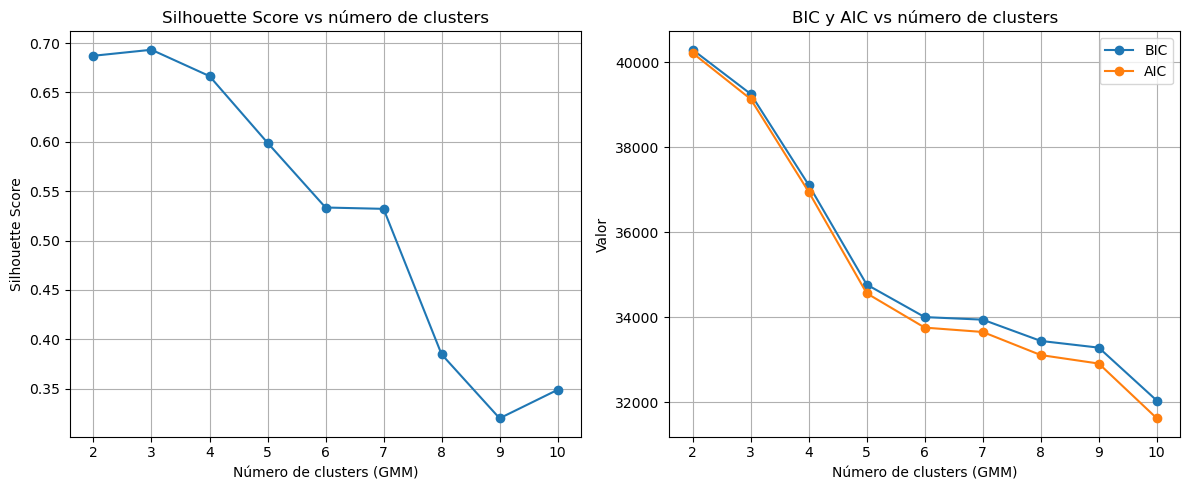

3
3


In [136]:
df_resultados, mejor_k = evaluar_gmm_n_components(X_pca)
print(mejor_k) 

El número de clusters óptimo para aplicar GMM es 3.

Con los valores optimizados de n-componentes observamos que son los que seleccionamos al principio, por lo tanto seguiremos trabajando con ese modelo

Analizamos la distribución de los clusters

Se observa que los cluster tienen cierto desbalance, pero no es extremo. 

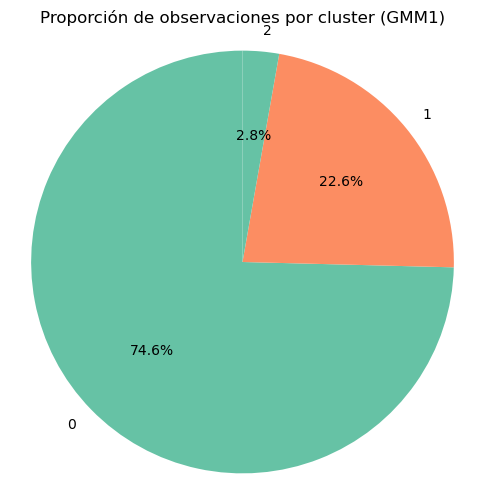

In [139]:
# Contamos cuántos elementos hay en cada cluster
conteo_clusters = df_pca['Cluster_GMM_k3'].value_counts().sort_index()

# Colores opcionales para cada cluster
colores = ['#66c2a5', '#fc8d62']  

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(conteo_clusters, labels=conteo_clusters.index,
        autopct='%1.1f%%', startangle=90, colors=colores)
plt.title("Proporción de observaciones por cluster (GMM1)")
plt.axis('equal')  
plt.show()

In [140]:
#Asignar etiquetas de cluster y analizar perfiles
labels = gmm.predict(X_pca)  
df_pca['Cluster_GMM_k3'] = labels

In [141]:
#Calculamos estadísticas descriptivas por cluster para entender sus características.
print(df_pca.groupby('Cluster_GMM_k3').mean())
print(pd.crosstab(df_pca['Cluster_GMM_k3'] , df['Calificación_promedio']))

                    PCA1      PCA2           ID
Cluster_GMM_k3                                 
0               1.174430  0.003683  4713.542738
1              -3.132766  0.637589  5805.373794
2              -6.021302 -5.286476  5223.243802
Calificación_promedio    1     2     3    4
Cluster_GMM_k3                             
0                      107  1482  3628  435
1                       20   437  1157  121
2                        2    50   141   18


Cluster 0: Es el más grande. Tiene muchas películas con calificación 3, seguido por 2 y 4. Parece representar películas promedio.
Cluster 1: Más balanceado entre 2 y 3, quizás películas con menor aceptación que las del cluster 0.
Cluster 2: Muy pequeño. La mayoría de las películas tienen calificación 3, pero también es el que menos datos contiene.

Cada celda muestra la cantidad de observaciones que están en cierto valor de Calificación_promedio para cada cluster.
En el cluster 0, hay 107 observaciones con Calificación promedio = 1. En el cluster 1, hay 20 y en el 2, 2 observaciones con ese mismo valor. 

<Axes: xlabel='Cluster_GMM_k3', ylabel='Calificación_promedio'>

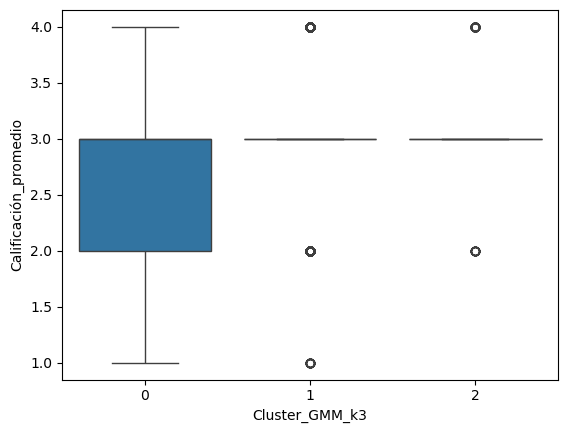

In [143]:
sns.boxplot(data=df_clusters, x="Cluster_GMM_k3", y="Calificación_promedio") 

En el cluster 0, la variable Calificacion_promedio tiene variabilidad, mientras que en el cluster 1 y 2 todos los valores están muy agrupados (todos tienen calificación cercana a 3). Por eso Q1 ≈ Q3 y las cajas se observan como una línea horizontal. Se observan outliers dispersos, pero la mayoría de los datos se encuntran en el mismo valor.

Visualizaremos los clusters con probabilidades, utilizaremos la máxima probabilidad de pertenencia para ver qué tan claros son los clusters.

In [145]:
modelo_usado = gmm
probas = modelo_usado.predict_proba(X_pca)
df_clusters["Confianza_cluster"] = probas.max(axis=1)
print(df_clusters[["Confianza_cluster"]].head(10))

    Confianza_cluster
0            1.000000
1            0.998592
3            0.998918
4            0.955402
6            0.999395
7            0.999030
8            0.968504
9            0.999081
13           0.998134
14           0.996212


Los valores son las máximas probabilidades de pertenencia por fila. Se observan valores altos (cercamos a 1) en las primeras filas.
Visualizaremos la distribución de la confianda en todo el dataset a través de un histograma de frecuencias.

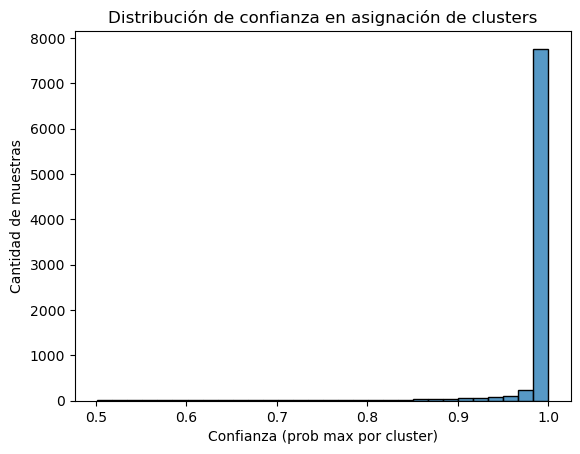

In [146]:
sns.histplot(df_clusters["Confianza_cluster"], bins=30)
plt.title("Distribución de confianza en asignación de clusters")
plt.xlabel("Confianza (prob max por cluster)")
plt.ylabel("Cantidad de muestras")
plt.show()

Observamos que la mayoria de las filas se agrupan cercano a 1, pocos valores se encuentran entre 0,85 y 0,9, lo cual es un buen indicador.

**Analizamos de las variables mas importantes en la separación de clusters**

Si bien el modelo GMM (Gaussian Mixture Model) no da importancia de variables directa como Random Forest, sí podremos estimar qué variables contribuyen más a la separación de los clusters. Compararemos las medias de las variables entre clusters, si una variable tiene medias muy distintas en cada cluster, probablemente contribuye más a diferenciarlos. Analizaremos las primeras 10 variables.

In [148]:
 # Creamos el DataFrame con componentes PCA
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Agregamos ID para mantener referencia
df_pca['ID'] = ids.values  

# Predecimos clusters con GMM usando X_pca
df_pca['Cluster_GMM_k3'] = gmm.predict(X_pca)

# Calculamos medias por cluster en los componentes PCA
medias_por_cluster = df_pca.groupby('Cluster_GMM_k3').mean()

# Calculamos todas las diferencias absolutas entre pares de clusters
from itertools import combinations

diferencias = {}
for c1, c2 in combinations(medias_por_cluster.index, 2):
    diff = (medias_por_cluster.loc[c1] - medias_por_cluster.loc[c2]).abs()
    diferencias[f'{c1} vs {c2}'] = diff

# Mostramos diferencias
print("Diferencias absolutas entre pares de clusters:")
for clave, valor in diferencias.items():
    print(f"\n{clave}:\n{valor}")

Diferencia absoluta en componentes PCA entre clusters:
PC1       4.307196
PC2       0.633905
ID     1091.831055
dtype: float64

Cantidad de elementos por cluster:
Cluster_GMM_k3
0    6493
1    1969
2     242
Name: count, dtype: int64


PC1 y PC2 son las dos componentes principales, y muestran qué tan distintos son los clusters en esas dimensiones.
El valor alto de PC1 sugiere que los clusters se separan principalmente a lo largo de esa componente.

A continuación analizaremos que variables son las que más influencia tienen sobre cada PC.

In [150]:
 # Aseguramos que la variable 'ID' no se use en los nombres de columnas para los loadings
X_for_pca = X_scaled_df.drop(columns='ID')

# Calculamos los "loadings", es decir, los pesos de cada variable en cada componente principal
loadings = pd.DataFrame(
    pca.components_.T,                    # Transponemos para que filas = variables
    index=X_for_pca.columns,             # Solo las columnas usadas en PCA
    columns=['PC1', 'PC2']               # Nombres de los componentes
)

# Mostramos las variables más influyentes en cada componente

print("Variables con mayor peso en PC1:")
print(loadings['PC1'].abs().sort_values(ascending=False).head(10))

print("\nVariables con mayor peso en PC2:")
print(loadings['PC2'].abs().sort_values(ascending=False).head(10))

Variables con mayor peso en PC1:
Lenguaje_English         0.382884
Pais_USA                 0.273478
Lenguaje_Japanese        0.184159
Pais_Japan               0.177575
Lenguaje_Italian         0.150429
Lenguaje_French          0.129985
Pais_Italy               0.122528
Pais_France              0.119816
Lenguaje_Korean          0.115053
Calificación_promedio    0.113476
Name: PC1, dtype: float64

Variables con mayor peso en PC2:
Productora_Lao Art Media                   0.264701
Director_Mattie Do                         0.264701
Protagonista_Yannawoutthi Chanthalungsy    0.264701
Lenguaje_Lao                               0.264701
Pais_"Lao Peoples Democratic Republic"     0.264701
Lenguaje_Japanese                          0.187492
Pais_Japan                                 0.184440
Productora_MVMT                            0.181613
Lenguaje_Akan                              0.181613
Pais_Ghana                                 0.181613
Name: PC2, dtype: float64


Esto significa que PC1 está fuertemente influenciado por variables relacionadas con idiomas y países (e.g. Lenguaje_English, Pais_USA, Lenguaje_Japanese) y PC2 está más influenciado por directores, productoras y protagonistas específicos, además de algunos idiomas y países menos comunes. Como el clustering fue hecho sobre estos componentes, es probable que la separación de clusters refleje diferencias principalmente en esas variables (las que más pesan en PC1 y PC2). Por ejemplo, un cluster puede estar asociado a películas con idioma inglés o de USA, y otro a películas con directores/productoras diferentes.

Ahora haremos los mismo para las variables ecaladas

In [152]:
# Creamos una copia del DataFrame escalado (X_scaled_df) y le agregamos los clusters desde df_clusters
df_scaled_cluster = X_scaled_df.copy()
df_scaled_cluster['Cluster_GMM_k3'] = df_clusters['Cluster_GMM_k3'].values

# Eliminamos la columna ID si está presente
if 'ID' in df_scaled_cluster.columns:
    df_scaled_cluster = df_scaled_cluster.drop(columns='ID')

# Agrupamos por cluster y calculamos las medias de cada variable
medias_por_cluster = df_scaled_cluster.groupby('Cluster_GMM_k3').mean()

# Calculamos la diferencia absoluta entre los clusters (asume que hay 2 clusters: 0 y 1)
diff = (medias_por_cluster.loc[0] - medias_por_cluster.loc[1]).abs()

# Ordenamos las variables por mayor diferencia
variables_mas_diferenciadoras = diff.sort_values(ascending=False)

# Mostramos las 10 variables que más separan los clusters
print("Las 10 variables originales (escaladas) que más separan los clusters:")
print(variables_mas_diferenciadoras.head(10))

Las 10 variables originales (escaladas) que más separan los clusters:
Lenguaje_English    1.843964
Pais_USA            1.272945
Lenguaje_Italian    0.912866
Lenguaje_French     0.763297
Pais_Italy          0.761619
Pais_France         0.713790
Pais_South Korea    0.556933
Lenguaje_Korean     0.554849
Lenguaje_Spanish    0.474150
Lenguaje_German     0.431098
dtype: float64


Este resultado obtenido analizando las variables originales escaladas, agrupadas por los clusters que generó GMM nos muestra cuales son las que más cambian entre los clusters. Por ejemplo, Lenguaje_English tiene una diferencia de 1.84 (diferencia importante) porque probablemente un cluster tiene muchas más películas en inglés que el otro. En cambio, el análisis de PCA muestra las variables que más peso tienen en las componentes principales (PC1 y PC2).
Si el objetivo es entender qué variables separan clusters realizamos análisis de las variables escaladas y si queremos entender qué variables explican la varianza general	utilizaremos PCA y sus pesos (components_)

Visualizaremos estas diferencias en un mapa de calor

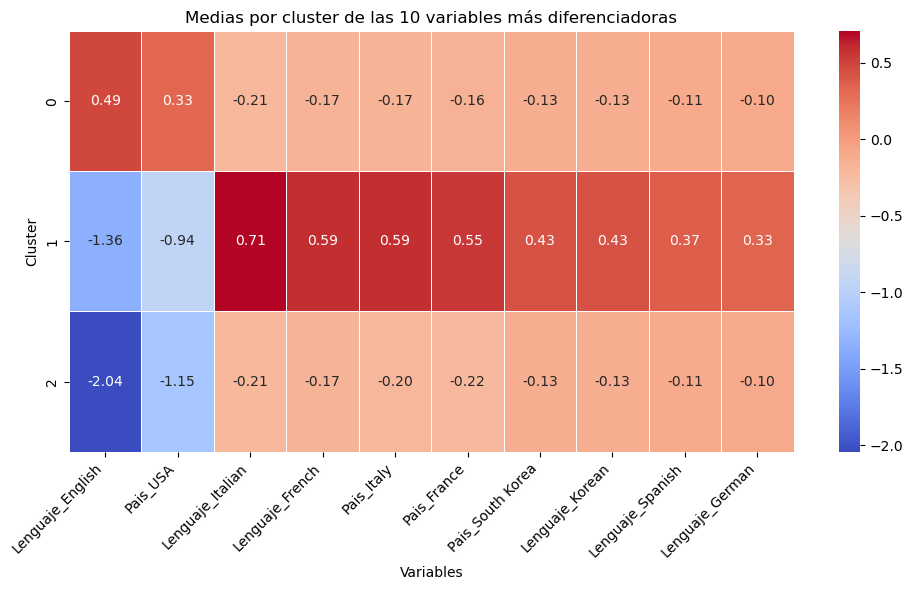

In [153]:
# Obtenemos las 10 variables más diferenciadoras 
top_variables = variables_mas_diferenciadoras.head(10).index.tolist()

# Seleccionamos solo esas variables del DataFrame con medias
medias_top = medias_por_cluster[top_variables]

# 3. Creamos el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(medias_top, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Medias por cluster de las 10 variables más diferenciadoras")
plt.xlabel("Variables")
plt.ylabel("Cluster")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Se observa que el Cluster 0 se caracteriza por tener peliculas con lenguaje ingles y como país de origen Estados Unidos, mientras que el cluster 1 se caracteriza por tener peliculas europeas con lenguaje europeo. El 2 no posee ninguna de las 10 variables principales que lo defina.

Ahora haremos lo mismo para las variables que son objetivo de nuestro analisis

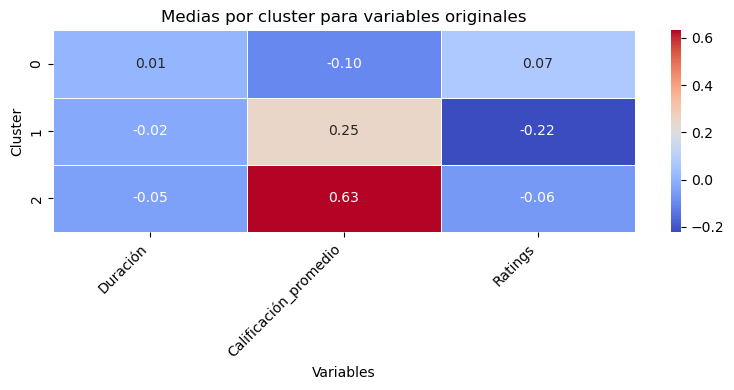

In [155]:
# Definimos las columnas originales que queremos
columnas_originales = ['Duración', 'Calificación_promedio', 'Ratings']

# Creamos un DataFrame con esas columnas + cluster
df_custom = X_scaled_df[columnas_originales].copy()
df_custom['Cluster_GMM_k3'] = df_clusters['Cluster_GMM_k3'].values

# Calculamos medias por cluster
medias_custom = df_custom.groupby('Cluster_GMM_k3').mean()

# Creamos el heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(medias_custom, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Medias por cluster para variables originales")
plt.xlabel("Variables")
plt.ylabel("Cluster")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

El valor de 0,63 positivo en Calificación_promedio significa que ese cluster tiene calificación promedio por encima de la media general. Debido a que está escalado esto se interpreta como 0.63 ≈ 0.63 desviaciones estándar arriba de la media. Por lo tanto si la variable Calificación_pormedio es mayor en el Cluster 2 y es nuestro parametro seleccionado para recomendar una pelicula, recomendaremos aquellas que se encuntran en dicho cluster. Por otra parte el cluster 0 parece representar una dimensión cultural y de mercado dominante, donde las películas de habla inglesa o de países con alta producción cinematográfica (EE.UU.) tienen más peso. El cluster 1 si bien tiene calificación promedio por encima de la media general es menor al Cluster 2. Por ulimo, el Cluster 1 no presenta una caracteristica relevante dentro de estas variables.

Veremos como se encuentran caracterizados los cluster por generos

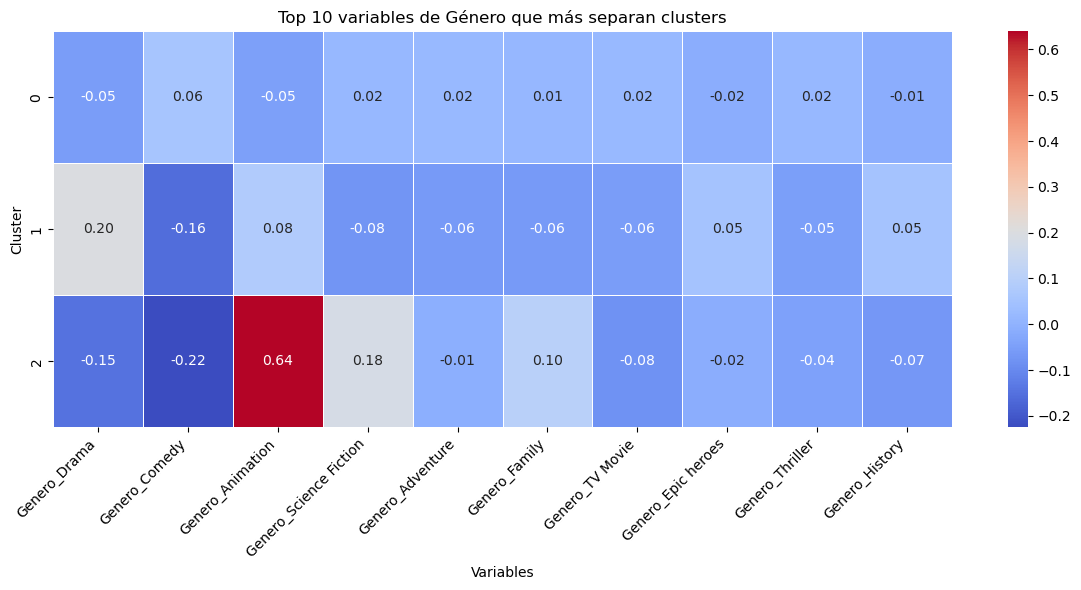

In [156]:
# 1. Seleccionamos las columnas que empiezan con 'Genero_'
columnas_genero = [col for col in X_scaled_df.columns if col.startswith('Genero_')]

# 2. Creamos DataFrame con esas columnas + cluster
df_custom = X_scaled_df[columnas_genero].copy()
df_custom['Cluster_GMM_k3'] = df_clusters['Cluster_GMM_k3'].values

# 3. Calculamos medias por cluster
medias_custom = df_custom.groupby('Cluster_GMM_k3').mean()

# 4. Calculamos diferencia absoluta entre clusters
diferencias = (medias_custom.loc[0] - medias_custom.loc[1]).abs()

# 5. Seleccionamos las 10 variables con mayor diferencia
top_10 = diferencias.sort_values(ascending=False).head(10).index

# 6. Filtramos el DataFrame de medias para esas variables
medias_top = medias_custom[top_10]

# 7. Graficamos el heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(medias_top, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Top 10 variables de Género que más separan clusters")
plt.xlabel("Variables")
plt.ylabel("Cluster")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

La media en cada cluster representa la proporción promedio de películas con ese género en ese cluster. Por ejemplo, el genero animacion en el Cluster 2 es 0,64 (el mas alto en el gráfico) significa que el 64% de las películas en ese cluster son de ese género.

*Analisis de las 10 peliculas mas caracteristicas de cada Cluster*

In [157]:
df = pd.read_csv('Movie_Data_File2.csv')

In [160]:
df['ID'] = df.index 

*Cluster 0*

In [162]:
# Asumiendo que labels y prob_max tienen el mismo orden que df_pca (y por ende los mismos IDs)
df_resultados = df_pca[['ID']].copy()  # tomo el ID de los datos procesados
df_resultados['Cluster_GMM_k3'] = labels
df_resultados['Prob_Cluster'] = prob_max

# Ahora unís df_resultados con el df original para agregar 'Film_title' o cualquier otra columna
df_final = df_resultados.merge(df[['ID', 'Film_title']], on='ID', how='left')

# Filtrás y ordenás para el cluster que quieras
cluster_objetivo = 0
df_cluster = df_final[df_final['Cluster_GMM_k3'] == cluster_objetivo]
df_cluster_sorted = df_cluster.sort_values(by='Prob_Cluster', ascending=False)

print(f"Top 10 películas más representativas del cluster {cluster_objetivo}:")
print(df_cluster_sorted[['Film_title', 'Prob_Cluster']].head(10))

Top 10 películas más representativas del cluster 0:
                        Film_title  Prob_Cluster
2640           Bells of San Angelo      0.999410
2947              White House Down      0.999410
3426                  Daisy Miller      0.999410
7939  Amend: The Fight for America      0.999410
5125      The Beginning or the End      0.999410
2510                   Cats & Dogs      0.999410
7337        The American President      0.999409
4650               The Hitch-Hiker      0.999409
5100                        Spring      0.999409
4306                   Beauty Shop      0.999409


Varias de estas películas tienen un fuerte enfoque en cultura, política o historia estadounidense. Se observa una relación entre géneros clásicos americanos y temáticas relacionadas con política, gobierno, sociedad o cultura estadounidense. En este grupo se pueden observar producciones con altos presupuestos o estudios conocidos. 

*Cluster 1*

In [163]:
# Asumiendo que labels y prob_max tienen el mismo orden que df_pca (y por ende los mismos IDs)
df_resultados = df_pca[['ID']].copy()  # tomo el ID de los datos procesados
df_resultados['Cluster_GMM_k3'] = labels
df_resultados['Prob_Cluster'] = prob_max

# Ahora unís df_resultados con el df original para agregar 'Film_title' o cualquier otra columna
df_final = df_resultados.merge(df[['ID', 'Film_title']], on='ID', how='left')

# Filtrás y ordenás para el cluster que quieras
cluster_objetivo = 1
df_cluster = df_final[df_final['Cluster_GMM_k3'] == cluster_objetivo]
df_cluster_sorted = df_cluster.sort_values(by='Prob_Cluster', ascending=False)

print(f"Top 10 películas más representativas del cluster {cluster_objetivo}:")
print(df_cluster_sorted[['Film_title', 'Prob_Cluster']].head(10))

Top 10 películas más representativas del cluster 1:
                      Film_title  Prob_Cluster
18                           Raw           1.0
30              Fantastic Planet           1.0
8669               La cosa buffa           1.0
34                       El Topo           1.0
8667                 Sahara Heat           1.0
8666                  The Cousin           1.0
8665                 Born Winner           1.0
8664                The Humanoid           1.0
8663            Who Saw Her Die?           1.0
8662  Short Night of Glass Dolls           1.0


En este cluster encontramos peliculas de Origen Europeo o no estadounidense, francesas, italianas o europeas en general. Tienen idioma distinto del inglés, con predominancia de idiomas como italiano, francés, español. Los genero que encontramos son alternativos, experimentales o de culto. Por otra parte son de época antigua o cine clásico europeo, varias de estas películas son de los años 60, 70 u 80 y suelen tener un enfoque narrativo más artístico, simbólico o de autor.

*Cluster 2*

In [164]:
# Asumiendo que labels y prob_max tienen el mismo orden que df_pca (y por ende los mismos IDs)
df_resultados = df_pca[['ID']].copy()  # tomo el ID de los datos procesados
df_resultados['Cluster_GMM_k3'] = labels
df_resultados['Prob_Cluster'] = prob_max

# Ahora unís df_resultados con el df original para agregar 'Film_title' o cualquier otra columna
df_final = df_resultados.merge(df[['ID', 'Film_title']], on='ID', how='left')

# Filtrás y ordenás para el cluster que quieras
cluster_objetivo = 2
df_cluster = df_final[df_final['Cluster_GMM_k3'] == cluster_objetivo]
df_cluster_sorted = df_cluster.sort_values(by='Prob_Cluster', ascending=False)

print(f"Top 10 películas más representativas del cluster {cluster_objetivo}:")
print(df_cluster_sorted[['Film_title', 'Prob_Cluster']].head(10))

Top 10 películas más representativas del cluster 2:
                              Film_title  Prob_Cluster
1513                  Millennium Actress      0.990550
1748  Nausicaä of the Valley of the Wind      0.990523
5143                            Agitator      0.990425
2501                                Ring      0.990405
2825       Godzilla vs. Mechagodzilla II      0.990355
1676                        Perfect Blue      0.990341
4081                       Shin Godzilla      0.990290
3092                          Death Note      0.990238
5390       Goké, Body Snatcher from Hell      0.990090
3054                           Appleseed      0.990090


Todas las películas del cluster 2 son japonesas, muchas son dirigidas por directores reconocidos de Japón (Satoshi Kon, Hayao Miyazaki, Hideaki Anno, etc.) y tienen idioma japones. El género predominante es anime, horror y sci-fi. Poseen una cultura visual y narrativa japonesa, muy distintos al occidental.

**Probamos el modelo**

Cantidad por cluster:
Cluster_GMM_k3
0    6493
1    1969
2     242
Name: count, dtype: int64

Perfil promedio por cluster:
                Calificación_promedio    Duración        Ratings           ID  \
Cluster_GMM_k3                                                                  
0                            2.725089  101.241953  127287.798860  4713.542738   
1                            2.932453  100.408837   41729.009142  5805.373794   
2                            3.157025   99.871901   88346.400826  5223.243802   

                Director_  Director_A.V. Rockwell  Director_Aaron B. Koontz  \
Cluster_GMM_k3                                                                
0                0.000924                0.000154                  0.000154   
1                0.000000                0.000000                  0.000000   
2                0.000000                0.000000                  0.000000   

                Director_Aaron Blaise  Director_Aaron Hann  \
Cluster_GMM_k

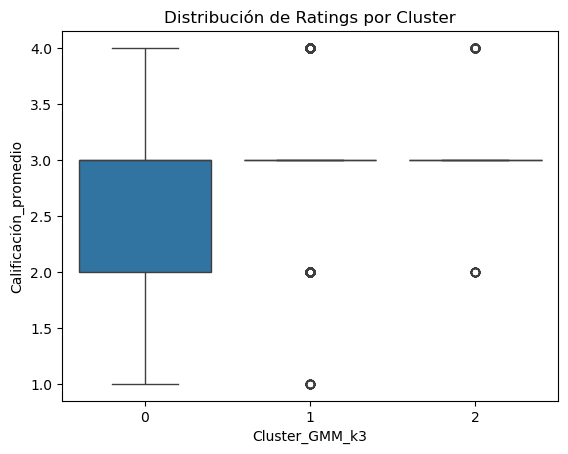

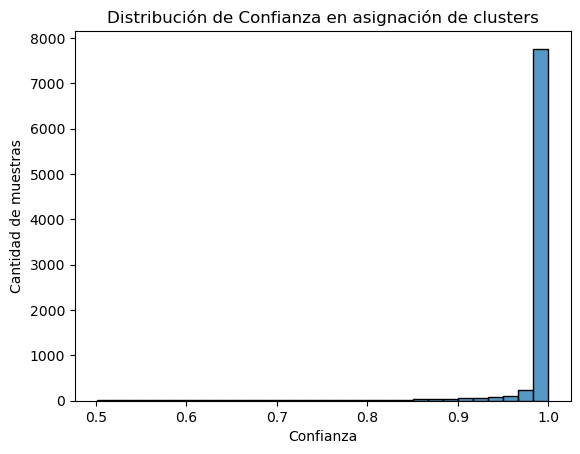

In [165]:
# Predecimos clusters
clusters_k3 = gmm.predict(X_pca)

# Obtenemos probabilidades de pertenencia
probas = gmm.predict_proba(X_pca)

# Agregamos resultados al DataFrame
df_clusters["Cluster_GMM_k3"] = clusters_k3
df_clusters["Confianza_cluster"] = probas.max(axis=1)

# Vemos cantidad de datos por cluster
print("Cantidad por cluster:")
print(df_clusters["Cluster_GMM_k3"].value_counts())

# Analizamos perfiles promedio por cluster
print("\nPerfil promedio por cluster:")
print(df_clusters.groupby("Cluster_GMM_k3").mean())

# Visualizamos distribución de una variable por cluster 
sns.boxplot(data=df_clusters, x="Cluster_GMM_k3", y="Calificación_promedio")
plt.title("Distribución de Calificación promedio por Cluster")
plt.show()

# Visualizamos distribución de confianza
sns.histplot(df_clusters["Confianza_cluster"], bins=30)
plt.title("Distribución de Confianza en asignación de clusters")
plt.xlabel("Confianza")
plt.ylabel("Cantidad de muestras")
plt.show()

En el gráfico de distribución por clusters con los valores originales se observa que como la mayoria de los valores se encuntran cercanos a 0, toma los valores mas altos como outliers, esto no sería asi ya que la variable tiene un rango de 0 a 5. Por otra parte, en la distribución de confianza se observan a la mayoria de las filas cercanas a 1 para esta variables también.

**Guardamos el modelo, scaler y columnas**

In [166]:
import joblib

# Guardamos el modelo GMM
joblib.dump(gmm, 'modelo_gmm.pkl')

# Guardamos el scaler
joblib.dump(scaler, 'scaler.pkl')

# Guardamos las columnas usadas para entrenar el modelo
columnas_usadas = X_scaled_df.columns.tolist()
joblib.dump(columnas_usadas, 'columnas_usadas.pkl')

print("Modelo, scaler y columnas guardados exitosamente.")

Modelo, scaler y columnas guardados exitosamente.


In [167]:
#Guardamos el modelo y los resultados
df_clusters["Cluster_GMM_k3"] = labels
df_clusters.to_csv("resultado_clusters.csv", index=False)

**Para utilizar el modelo con otros datos en un futuro**

In [169]:
# Guardar el modelo PCA entrenado
joblib.dump(pca, 'pca.pkl')
print("Modelo PCA guardado exitosamente.")

Modelo PCA guardado exitosamente.


In [ ]:
# Cargamos modelos y objetos guardados
gmm = joblib.load('modelo_gmm.pkl')
scaler = joblib.load('scaler.pkl')

pca = joblib.load('pca.pkl')  # Tenés que haber guardado también el PCA
columnas_usadas = joblib.load('columnas_usadas.pkl')

# Cargamos nuevo dataset
nuevo_df = pd.read_csv('nuevo_dataset.csv')

# One-hot encoding con las columnas categóricas usadas
columnas_categoricas = ['Director', 'Genero', 'Pais', 'Lenguaje', 'Productora', 'Protagonista']
nuevo_df = pd.get_dummies(nuevo_df, columns=columnas_categoricas)

# Alineamos columnas con las usadas en entrenamiento
nuevo_df = nuevo_df.reindex(columns=columnas_usadas, fill_value=0)

# Escalamos
nuevo_df_scaled = scaler.transform(nuevo_df)

# Transformamos con PCA
nuevo_df_pca = pca.transform(nuevo_df_scaled)

# Predecimos clusters con GMM sobre datos PCA
clusters_predichos = gmm.predict(nuevo_df_pca)

print("Clusters predichos para nuevo dataset:")
print(clusters_predichos)

## Conclusión

 Durante el proyecto se exploraron varios métodos de agrupamiento no supervisado tras aplicar, en algunos, reducción de dimensionalidad con análisis de Componentes Principales (PCA). Aunque se probaron técnicas como K-Means y DBSCAN, estos métodos no lograron una separación adecuada de los clusters. En contraste, el algoritmo GMM resultó ser el más útil, ya que logró identificar agrupamientos más coherentes y significativos.

*Resultados:*

Cluster 0(contiene la mayoría de peliculas):

-Tiene una calificación promedio más baja. Se caracteriza por tener películas de origen USA y idioma ingles. 

Cluster 1:

-Se caracteriza por tener una calificación promedio mayor al 0 y son peliculas antiguas provenientes de origen europeo.

Cluster 2:

-Esta compuesto por peliculas japonesas y tiene la calificación promedio mas alta.

Respecto a los componentes de PCA, el componente principal 1 (PC1) está dominado por variables relacionadas con lenguaje y país (ej. inglés, USA, japonés, Japón, italiano, Italia, francés, Francia). Esto indica que PC1 está capturando una gran parte de la variabilidad basada en la localización geográfica y el idioma.

Debido a que la variable Calificación promedio es la que utilizaremos para cumplir con nuetro objetivo de analisis, recomendaremos las peliculas del cluster 2.